# **Blockchain Big Data Deep Learning Analysis, Visualization, Comparison and Predictions**
## CS 6515 course project
### Author: Chris Gang Liu - B00415613

# Introduction to Blockchain and Ethereum

BC is a secured, shared, and distributed ledger that facilitates the process of recording and tracking resources without the need of a centralized trusted authority. It allows two or more parties to communicate and exchange resources in a peer-to-peer network where distributed decisions are made by the majority rather than by a single centralized authority. 
Transactions on the Blockchain can generate gigebytes of data every few minutes. Many transactions can fail without clear explanations from Ethereum newtork. 
<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/09/Vitalik_Buterin_TechCrunch_London_2015.jpg/413px-Vitalik_Buterin_TechCrunch_London_2015.jpg" />
 <!--  <img style="width:453px;hight:453px" src="https://thumbs.dreamstime.com/z/ethereum-symbol-futuristic-hud-banner-polygon-background-world-map-blockchain-peer-to-network-global-cryptocurrency-106345513.jpg" /> -->
    <br>
Ethereum founder Vitalik Buterin in 2015
    <br>photo credit to https://en.wikipedia.org/wiki/Ethereum
    </center><br><br>
<div style="font-weight: 500">
This notebook is trying to discover the hidden patterns behind the transaction results from three perceptives:
<ul>
    <li>Transaction Status Analytics (Binary-Classification): Predict transaction status (0/1)</li>
    <li>Transaction Error Types Analytics (Multiclass Classification): Learning for predict the Ethereum transaction error types</li>
    </ul>
          </div>


#### References

Google BigQuery, https://github.com/SohierDane/BigQuery_Helper

Etherenum real time data extraction, https://github.com/blockchain-etl/ethereum-etl.

Google Application Credential: https://cloud.google.com/docs/authentication/getting-started#auth-cloud-implicit-python
DOI:http://dx.doi.org/10.1145/2213836.2213961

Mohammad Etemad, Transportation Modes Classification Using Feature Engineering: https://www.researchgate.net/publication/326696576_Transportation_Modes_Classification_Using_Feature_Engineering

Exporting and Analyzing Ethereum Blockchain, https://medium.com/@medvedev1088/exporting-and-analyzing-ethereum-blockchain-f5353414a94e
[5]	Datasets online: https://console.cloud.google.com/bigquery?project=bigquery-public-data&redirect_from_classic=true&pli=1&p=bigquery-public-data&d=ethereum_blockchain
[6]	Time series forcasting: https://www.tensorflow.org/tutorials/structured_data/time_series
[7]	https://openethereum.github.io/wiki/JSONRPC-trace-module
[8]	Time series forecasting | TensorFlow Core. https://www.tensorflow.org/tutorials/structured_data/time_series
[9]	Etherenum Stock Price: https://finance.yahoo.com/quote/ETH-USD
[10]	Dense vs convolutional vs fully connected layers - Part 1 .... https://forums.fast.ai/t/dense-vs-convolutional-vs-fully-connected-layers/191
[11]	TensorFlow 2 Tutorial: Get Started in Deep Learning With .... https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/


# Content :
<hr>

* **[Project Requirements Preview](#Project-Requirements-Preview)**
* [Introduction to Blockchain and Ethereum](#Introduction-to-Blockchain-and-Ethereum)
* [Work Environment Preparation](#Work-Environment-Preparation)
    * [Load common libraries](#Load-common-libraries)
    * [Big Query Code for Extracting Ethereum Data for Training and Validation](#Big-Query-Code-for-Extracting-Ethereum-Data)
    * [Goable Varibles](#Goable_Varibles)
    * [Reusable Functions](#Reusable-Functions)
* **[Transaction Status Analytics (Binary-Classification)](#Transaction-Status-Analytics-(Binary-Classification))**
    * **[Transaction Status Data Flow chart and explanation](#Transaction-Status-Data-Flow-chart-and-explanation)**
    * [Transaction Status Data Extraction](#Transaction-Status-Data-Extraction)
    * [Transaction Status Data Preprocessing](#Transaction-Status-Data-Preprocessing)
    * [Transaction Status Feature Engineering](#Transaction-Status-Feature-Engineering)
    * [Split Transaction Data into Train, Validate and Test](#Split-Transaction-Data-into-Train,-Validate-and-Test)
    * ***[Build Transaction Status Model A](#Build-Transaction-Status-Model-A)***
    * [Evaluate Transaction Model A](#Evaluate-Transaction-Model-A)
    * ***[Build Transaction Status Model B](#Build-Transaction-Status-Model-B)***
    * [Evaluate Transaction Model B](#Evaluate-Transaction-Model-B)
    * [Save Transaction Model B and Diagram](#Save-Transaction-Model-B-and-Diagram)
    * **[Compare Transaction Status Model A and Model B baseline](#Compare-Transaction-Status-Model-A-and-Model-B-baseline)**
    * ***[Build Transaction Status Optimized Model C](#Build-Transaction-Status-Optimized-Model-C)***
    * [Evaluate Transaction Model C](#Evaluate-Transaction-Model-C)
    * [Save Transaction Model C and Diagram](#Save-Transaction-Model-C-and-Diagram)
    * **[Compare Transaction Status Model A, B and C](#Compare-Transaction-Status-Model-A-and-Model-B-baseline)**
    * [Extract Another Test Data to Validate Transaction Status Model](#Extract-Another-Test-Data-to-Validate-Transaction-Status-Model)
    * [Conclusion: Generalize guildline of predicting transaction status for Enduser](#Conclusion:-Generalize-guildline-of-predicting-transaction-status-for-Enduser)
* **[Transaction Error Types Analytics (Multiclass Classification)](#Transaction-Error-Types-Analytics-(Multiclass-Classification))**
    * [Transaction Error Types Data Flow chart and explanation](#Transaction-Error-Types-Data-Flow-chart-and-explanation)
    * [Transaction Error Types Data Extraction](#Transaction-Error-Types-Data-Extraction)
    * [Transaction Error Types Data Preprocessing](#Transaction-Error-Types-Data-Preprocessing)
    * [Transaction Error Types Feature Engineering](#Transaction-Error-Types-Feature-Engineering)
    * [Split Transaction Error Types Data into Train, Validate and Test](#Split-Transaction-Error-Types-Data-into-Train,-Validate-and-Test)
    * ***[Build Transaction Error Types Model A](#Build-Transaction-Error-Types-Model-A)***
    * [Evaluate Transaction Error Types Model A](#Evaluate-Transaction-Error-Types-Model-A)
    * [Save Transaction Error Types Model A and Diagram](#Save-Transaction-Error-Types-Model-A-and-Diagram)
    * ***[Build Transaction Error Types Model B](#Build-Transaction-Error-Types-Model-B)***
    * [Evaluate Transaction Error Type Model B](#Evaluate-Transaction-Error-Types-Model-B)
    * **[Compare Transaction Error Types Model A and Model B baseline](#Compare-Transaction-Error-Types-Model-A-and-Model-B-baseline)**
    * [Save Transaction Error Types Model B and Diagram](#Save-Transaction-Error-Types-Model-B-and-Diagram)
    * **[Build Transaction Error Types Optimized Model C](#Build-Transaction-Error-Types-Optimized-Model-C)**
    * [Evaluate Transaction Error Types Model C](#Evaluate-Transaction-Error-Types-Model-C)
    * **[Compare Transaction Error Types Model A, B and C](#Compare-Transaction-Error-Types-Model-A,-B-and-C)**
    * [Save Transaction Error Types Model C and Diagram](#Save-Transaction-Error-Types-Model-C-and-Diagram)
    * [Extract Another Test Data to Validate Transaction Error Types Model](#Extract-Another-Test-Data-to-Validate-Transaction-Error-Types-Model)
    * [Conclusion: Generalize guildline of predicting Transaction Error Types for Enduser](#Conclusion:-Generalize-guildline-of-predicting-Transaction-Error-Types-for-Enduser)


## Project Requirements Preview
#### I am providing the brief answers for the following questions, the details were specifically illustrated in accompanying words documentation.
## Step one
In this step, you decide on your project. The project must have the following features. 1- data processing is a solution for the project. 2- data must be a kind of big data. Review the V’s ( volume, variety, velocity, veracity, value). Make sure to select a dataset that has some features of big data. 3- the solution must include at least three topics from what you have learned during this class: For example, data pre-processing (clustering), building model (classification), and visualization. 4- you are allowed to work on any topic, even the projects defined in the Assignments. If you want to work on an assignment, your submission must have considerable improvement from your previous submission. This step has 20 points.

#### Answer: I am extracting the Ethereum Data from BigQuery; The Ethereum Data over BigQuery generates hundreds of Gigabytes every minutes, and it is composed by multiple tables for analytics. I utilized data pre-processing, feature engineering, building model, evaluating the models, compare models each other and optimizing the models. Besides the visualization comes through the whole process. 
#### I dentified there are several interesting topics I can work on, such as:
#### 1.1.  Transaction Status Analytics (Binary-Classification): learning for prediction Ethereum trnasaction status.
#### 1.2.  Transaction Error Types Analytics (Multiclass Classification): Learning for predict the Ethereum transaction error types.

## Step two
After selecting your topic, you must conduct research to find available/possible solutions. Make a list of available/possible solutions and report the followings: 1- a brief explanation of the solutions 2- a justification that each solution ad- dresses the problem properly, and there are no false assumptions. 3- list the strengths and weaknesses of each solution. You can provide evidence from their reports or your own judgment. 4- Select one solution to your problem. This can come from the solutions you have found or your own innovative approach. This step has 20 points.

#### Answer: For each of topic, I consider about three possible solutions (details refer to words documentation).
#### 2.1.  Transaction Status Analytics (Binary-Classification): learning for prediction Ethereum trnasaction status.
<ul>
    <li>SKlearn (e.g. Random forest tree, SVM): advantage: easy to train and build, easy to tune up the hypermeters like depth, iteration. Disadvantage: Less interpreation, less accuracy on BIg data, less efficiency on Big Data.</li>
<li>Tensorflow (Binary): advantage: more efficient and accuarcy on big data training, utilize GPU and CPU together. less learning curve compared with PyTorch. Disadvatage: higher learning curve compared with SKLearn.</li>
<li>PyTorch: advantage: more specific customization of neural networking, maximize the potential power of GPU. Disadvantages: highest learning curve, need more testing on tuning up hyperparameters.</li></ul>

#### 2.4.  Transaction Error Types Analytics (Multiclass Classification): Learning for predict the Ethereum transaction error types.
##### Solutions, advantage and disadvantages refere to Topic 1



## Step three
Either selecting an approach from your research or your own solution, you must explain it in detail here. pay attention to the following items: 1- Explain the solution in a general way and draw a big picture of the solution for your reader. You can include some high-level diagrams, such as a data flow diagram. 2- explain each component of the big picture. make sure to explain the objective and reason that each component should be part of the solution 3- use some sample data and explain how your solution resolves that sample data. This step has 20 points.

#### Answer: Based on analyzing the solutions discussed in Step two, I decided to choose Keras + Keras (Binary, Multi-classification) for soluton for each of topics.
#### Diagram, descriptions and data training details please refer to each of topic in the following sections and words documentation.


## Step four
Here you explain your data and evaluate your model. To explain your data/- datasets, make sure selected datasets are covering the objectives of your re- search. If you need more than one dataset, feel free to add new datasets. Then, you evaluate your model. Make a list of all messages in your report. For exam- ple, if your message is ”model A is better than model B”, you need to define an experiment for that. Note that some comparisons may not be valid. For exam- ple, if your model contains a random component, you cannot simply compare the accuracy of them. You need some statistical approach to show the increase of one accuracy is not by chance. for each experiment, do research, and find the best ways of evaluation. For example, if you compare two classification meth- ods, you create a list of evaluation metrics such as accuracy, recall, f-measure and etc. Explain why you select a metric for evaluating your experiment. This step has 20 points.

#### Answer: I utilize following metrecs to evaluate my models for comparsion. I utilize visualization to make the comparsion more impressive:
<ul>
    <li>keras.metrics.TruePositives(name='tp'), # evaluate true position value</li>
      <li>keras.metrics.FalsePositives(name='fp'), # evaluate false position value</li>
      <li>keras.metrics.TrueNegatives(name='tn'), # evaluate true negative value</li>
      <li>keras.metrics.FalseNegatives(name='fn'),  # evaluate false negative value</li>
      <li>keras.metrics.BinaryAccuracy(name='binaryAccuracy'), # evaluate binary 1/0 classification </li>
      <li>keras.metrics.CategoricalAccuracy(name='MulticlassAccuracy'), # evaluate multi-classes classification</li>
      <li>keras.metrics.Precision(name='precision'), # evaluate precision true_positives / (predicted_positives + K.epsilon())</li>
      <li>keras.metrics.Recall(name='recall'), # evaluate recall true_positives / (possible_positives + K.epsilon())</li>
      <li>keras.metrics.AUC(name='auc'), # evaluate area under curve of ROC</li>
    <li>my_f1 / multiclass_f1 # as Dr. Etemad pointed out in his paper(Transportation Modes Classification Using Feature Engineering): we need f1 as impartant as accuracy for imbalanced data.</li>
      <li>keras.metrics.MeanSquaredError(name='mse') # evaluate regression type or time-series LSTM .</li>
</ul>

#### For each model, I gives possible optimization solutions, such as dropout, early dropping, weight and bias preadjustment.

## Step five
In this step, you explain the problem and solutions briefly. Then you tell your messages to the reader. Now, you can add a few future works that can be done after this research. This can be in connection with the weaknesses that you find in the selected approach.
This step has 20 points.

#### Answer: In word documentation, I summarized the problem solutions. Aslo the limitations during this project and future works on these limitations were discussed at the end of documentations.


## Work Environment Preparation

* [Load common libraries](#Load-common-libraries)
* [Big Query Code for Extracting Ethereum Data for Training and Validation](#Big-Query-Code-for-Extracting-Ethereum-Data)
* [Goable Varibles](#Goable_Varibles)
* [Reusable Functions](#Reusable-Functions)

### Load common libraries

In [1]:
# https://github.com/SohierDane/BigQuery_Helper
from bq_helper import BigQueryHelper

# This establishes an authenticated session and prepares a reference to the dataset that lives in BigQuery.
bq_assistant = BigQueryHelper("bigquery-public-data", "crypto_ethereum")
import pandas as pd

# client = bigquery.Client()
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import datetime
import tempfile
    
import IPython
import IPython.display
%matplotlib inline
plt.style.use('ggplot')
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

In [2]:
#/*#matplotlib inline means that any graph we create, will appear in the same notebook file*/
import numpy as np
from numpy import mean
from numpy import std
import pandas as pd
from matplotlib import pyplot
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import seaborn as sns #styling plots
import difflib
import math
from scipy import stats
from scipy.stats import mode

In [3]:
#load deep learning library
import tensorflow as tf
from tensorflow import keras
from keras import backend as K
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from livelossplot import PlotLossesKeras
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
print(tf.__version__)

2.3.1


In [4]:
# metrics libraries
import pandas_profiling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import hamming_loss
import tensorflow_addons as tfa
import pickle

In [5]:
import warnings

warnings.filterwarnings('ignore')

Goal:
1, target on the estimated gas, to make it as close as used-gas. Because accruately set estimated gas can avoid "out-of-gas" error which is one of the most tx failures.
2. target on the recipt_status, to investigate what factors influence on the tx success or not.

### Big Query Code for Extracting Ethereum Data

In [6]:
#bigquery-public-data.crypto_ethereum.transactions
txquery = """
SELECT 
  nonce, value, gas, BYTE_LENGTH(input) as input_size,  receipt_cumulative_gas_used, receipt_gas_used, receipt_contract_address, receipt_status, block_timestamp, block_number
FROM
  `bigquery-public-data.crypto_ethereum.transactions` AS transactions
WHERE TRUE
  AND block_timestamp >= '2019-09-01 00:00:00'
  AND block_timestamp < '2019-09-01 03:00:00'
"""

#bigquery-public-data.crypto_ethereum.traces
traces_query = """
SELECT 
  transaction_hash, from_address, to_address, value, BYTE_LENGTH(input) as input_size, trace_type, call_type, reward_type, gas, error, status
FROM
  `bigquery-public-data.crypto_ethereum.traces` AS traces
WHERE TRUE
  AND block_timestamp >= '2019-09-01 15:00:00'
  AND block_timestamp < '2019-09-07 15:00:00'
  AND status = 0
LIMIT 500000
"""

### Reusable Functions

In [7]:
def exeQuery(query):
    df = bq_assistant.query_to_pandas_safe(query, max_gb_scanned=100)
    # Look at the first 10
    return df

<b>Explanatory furntions</b>

In [8]:
def visulizeCorr(df, width=20, height=6):
    from matplotlib import pyplot
    import seaborn as sns
    corr = df.corr()
    print(corr)
    fig, ax = pyplot.subplots(figsize=(width,height))
    sns.heatmap(corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns)
    return corr

In [9]:
def violin(df, width=20, height=6):
    from matplotlib import pyplot
    import seaborn as sns
    fig, ax = pyplot.subplots(figsize=(width,height))
    violin_t = sns.violinplot(ax=ax,data=df)

In [10]:
#visulize the data analytics:
#from the result ,we can say the database is imbalanced and mutliple classes tables
def histogram_df(df, x_title, y_title, width, height):
    plt.figure(figsize=(width,height))
    df.groupby(x_title)[y_title].apply(lambda x: len(x.unique())).plot(kind='bar')
    plt.xticks(rotation='vertical')
    plt.ylabel(x_title)
    plt.xlabel("Amount of " + y_title)
    plt.show()

In [11]:
def profilingDf(df, html):
    df_report = pandas_profiling.ProfileReport(df)
    df_report.to_file(html)
    return html

<b>Data Normalization reusable function</b>

In [12]:
#normalize the data function
def normalizeDataWithStd(df, train_df, val_df, test_df):
    train_mean = train_df.mean()
    train_std = train_df.std()

    train_df = (train_df - train_mean) / train_std
    val_df = (val_df - train_mean) / train_std
    test_df = (test_df - train_mean) / train_std
    
    df_std = (df - train_mean) / train_std
    df_std = df_std.melt(var_name='Column', value_name='Normalized')
    plt.figure(figsize=(12, 6))
    ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
    _ = ax.set_xticklabels(df.keys(), rotation=90)
    return train_df, val_df, test_df, df_std

In [13]:
def norm(x, mean, std):
    return (x - mean) / std

In [14]:
#genelize the ordinal encoder
def ourOrdinalEncoder(df, column):
    from sklearn.preprocessing import OrdinalEncoder
    enc = OrdinalEncoder()
    new_values=enc.fit_transform(df[column].values.reshape(-1,1).astype(str))
    print(enc.categories_ )
    return new_values

#genelize the label encoder
def ourLabelEncoder(df, column):
    from sklearn.preprocessing import LabelEncoder
    label = LabelEncoder()
    new_values = label.fit_transform(df[column])
    print(label.classes_ )
    return new_values

#generalize the max min scalar
def ourScalar(df, column):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    new_values = scaler.fit_transform(df[[column]])
    new_values = np.clip(new_values, -5, 5)
    print("scalar values:", new_values)
    return new_values

#generalize the max min scalar
def stdScalar(df, labelColumn):
    new_df = df.copy().astype(float)
    if isinstance(labelColumn, str):
        labelColumn = [labelColumn]
    normColumns = new_df.columns.difference(labelColumn)
    df_mean = new_df[normColumns].mean()
    df_std = new_df[normColumns].std()
    new_df[normColumns] = (new_df[normColumns] - df_mean) / df_std
    return new_df

In [15]:
# oversampling imbalanced split train and test data
def generateTrainValidationAndTestData(df, label, mean=0, std=1, labelColumn=[]):
    ros = RandomOverSampler(random_state=42)
    new_df = df.copy()
    Y = new_df[label].to_numpy()
    X = new_df.drop(label, axis=1).astype('float32')
    X = X.to_numpy()
    X_resampled, Y_resampled = ros.fit_sample(X, Y)
    #saved normalized statistics in layer
    normalizer = tf.keras.layers.experimental.preprocessing.Normalization()
    normalizer.adapt(X_resampled)
    #This calculates the mean and variance, and stores them in the layer.
    print(normalizer.mean.numpy())

    x_train, x_validate, y_train, y_validate = train_test_split(X_resampled, Y_resampled, 
                                                                                test_size=0.4, random_state=9000, shuffle=True)
    x_validate, x_test, y_validate, y_test = train_test_split(x_validate, y_validate, 
                                                                                test_size=0.2, random_state=9000, shuffle=True)

    unique_Y, counts_Y = np.unique(Y, return_counts=True)
    unique_y_train, counts_y_train = np.unique(Y_resampled, return_counts=True)
    fig = plt.figure(figsize=(20,20))
    (ax_train, ax_train_resampled) = fig.subplots(ncols=2, nrows=1)
    g1 = sns.barplot(x=unique_Y, y=counts_Y, ax=ax_train)
    g2 = sns.barplot(x=unique_y_train, y=counts_y_train, ax=ax_train_resampled)
    g1.set_title("class distribution before resampling")
    g2.set_title("class distribution in training set after resampling")
    return x_train, x_validate, x_test, y_train, y_validate, y_test, normalizer

##### Visualization functions

In [16]:
# we will utilize PRECISION, RECALL, AUC, ACCURACY ETC. to evaluate models
# confustion matrix:
#                        Actual Positive    Acutal Negative
# Predict Postitive              TP                      FP
#
# Predict Negative               FN                      TN
#


def plot_ROC(y_true, y_pred, modelName):
    fpr, tpr, thresholds = roc_curve(
        y_true, y_pred, pos_label=1)
    auc_o = "%.2f" % auc(fpr, tpr)
    title = 'ROC Curve, AUC = '+str(auc_o)
    print("ROC Curve, AUC =: {}", auc_o)
    print("---") 
    with plt.style.context(('ggplot')):
        fig, ax = plt.subplots()
        ax.plot(fpr, tpr, color=colors[0], label='ROC curve')
        ax.plot([0, 1], [0, 1], color=colors[1], label='Baseline')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.title('CSCI 6515 Course Project AUC ' + modelName)
    return auc_o 

def print_all_score(y_true, y_pred, model):
    modelName = model.__class__.__name__
    print("ML model: ", modelName)
    print("---")   
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print("tn, fp, fn, tp: {}", tn, fp, fn, tp)
    print("---")
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy: {}", accuracy)
    print("---")
    precision = precision_score(y_true, y_pred, average='macro')
    print("Precision: {}", precision)
    print("---") 
    loss = hamming_loss(y_true, y_pred)
    print("loss: {}", loss)
    print("---") 
    mse = mean_squared_error(y_true, y_pred)
    print("mean_squared_error: {}", mse)
    print("---") 
    recall = recall_score(y_true, y_pred, average='macro')
    print("Recall: {}", recall)
    print("---") 
    #f1 = format(2 * (precision * recall) / (precision + recall))
    #instead as TA declared in email, we need to use average='macro'
    f1 = f1_score(y_true, y_pred, average='macro')
    print("F1 score: {} ", f1)
    print("---") 
    auc_o = plot_ROC(y_true, y_pred, modelName) 
    return tn, fp, fn, tp, accuracy, precision, recall, f1, auc_o, mse


def print_multiclass_all_score(y_true, y_pred, model):
    modelName = model.__class__.__name__
    print("ML model: ", modelName)
    print("---")  
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy: {}", accuracy)
    print("---")
    mse = mean_squared_error(y_true, y_pred)
    print("mean_squared_error: {}", mse)
    print("---") 
    f1 = f1_score(y_true, y_pred, average='weighted')
    print("F1 score: {} ", f1)
    print("---") 
    loss = hamming_loss(y_true, y_pred)
    print("loss: {} ", loss)
    print("---")     
    return accuracy, f1, mse, loss

In [17]:
def plot_history_metrics(history, mode='binary'):
    metrics =  ['binaryAccuracy', 'precision', 'recall', 'my_f1', 'auc', 'mse']
    if mode == 'binary':
        amount = 6
    else:
        amount = 4
        metrics = ['accuracy', 'multiclass_f1', 'loss', 'mse']
    m = math.ceil(amount / 2)
    fig, axes = plt.subplots(m, 2, figsize=(16, 8 * m))
    n = 0

    for k, metric in enumerate(metrics):
        #check if including that metrics
        if metric in history.history.keys():
            axes[math.floor(n / 2), n%2].plot(history.epoch,  history.history[metric])
            axes[math.floor(n / 2), n%2].plot(history.epoch, history.history['val_'+metric])
            axes[math.floor(n / 2), n%2].set_xlabel('Epoch')
            axes[math.floor(n / 2), n%2].set_ylabel(metric)
    #         axes[math.floor(n / 2), n%2].legend()
            n = n+1;
    plt.suptitle('6515 project model history metrics')
    # plt.figure(figsize=(60, 45))
    plt.show()

In [18]:
def plot_confusematrix(tn, fp, fn, tp, p=0.5):
    cm = [[tn, fp],[fn, tp]]
    plt.figure(figsize=(5,5))
#     sns.heatmap(cm, annot=True, fmt="d")
    sns.heatmap(cm, annot=True, fmt='.1f')
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

<b>Customized Evaluation Functions</b>

In [19]:
# predefine the recall precision and f1 as additions to existing keras metrics
def my_recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def my_precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def my_f1(y_true, y_pred):
    precision = my_precision(y_true, y_pred)
    recall = my_recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def keras_f1(precision, recall):
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#customize hamming loss calualation for multiclass
def keras_multiclass_loss(y_true,y_pred):
    loss = tfa.metrics.hamming.hamming_loss_fn(y_true,y_pred, mode='multiclass', threshold=0.4)
    return loss

# this function was modified based on https://www.kaggle.com/guglielmocamporese/macro-f1-score-keras
def multiclass_f1(y_true, y_pred):
    def marco_f1(y_true, y_pred, beta=1, threshold=0.6):
        y_true = K.cast(y_true, 'float')
        y_pred = K.cast(K.greater(K.cast(y_pred, 'float'), threshold), 'float')
        tp = K.sum(y_true * y_pred, axis=0)
        fp = K.sum((1 - y_true) * y_pred, axis=0)
        fn = K.sum(y_true * (1 - y_pred), axis=0)
        p = tp / (tp + fp + K.epsilon())
        r = tp / (tp + fn + K.epsilon())
        f1 = (1 + beta ** 2) * p * r / ((beta ** 2) * p + r + K.epsilon())
        f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
        return K.mean(f1)
    return marco_f1(y_true, y_pred, 1, 0.4)



### Goable Varibles

In [20]:
BATCH_SIZE = 300 # default training models batch size
EPOCH = 20 # default training times

In [21]:
METRICS = [
    keras.metrics.TruePositives(name='tp'), # evaluate true position value
    keras.metrics.FalsePositives(name='fp'), # evaluate false position value
    keras.metrics.TrueNegatives(name='tn'), # evaluate true negative value
    keras.metrics.FalseNegatives(name='fn'), # evaluate false negative value
    keras.metrics.BinaryAccuracy(name='binaryAccuracy'), # evaluate binary 1/0 classification
    keras.metrics.CategoricalAccuracy(name='MulticlassAccuracy'), # evaluate multi-classes classification
    keras.metrics.Precision(name='precision'), # evaluate precision true_positives / (predicted_positives + K.epsilon())
    keras.metrics.Recall(name='recall'), # evaluate recall true_positives / (possible_positives + K.epsilon())
    keras.metrics.AUC(name='auc'), # evaluate area under curve of ROC
    my_f1, #manually calcuate f1
    keras.metrics.MeanSquaredError(name='mse') # evaluate mean square errors .
]

In [22]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

<b>Build the Deep Learning Model</b>

In [23]:
# define a relatively complex model with flexible parameters for both binary and multi-class classification
def build_model(optimizer, output_dim, ouput_activation, loss_fn, n_features, metrics = METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = keras.initializers.Constant(output_bias)
    model = Sequential()
    model = keras.Sequential([
        Dense(200, kernel_initializer="he_normal", activation="relu", input_shape=(n_features,)),
        keras.layers.Dropout(0.5),
        Dense(100, kernel_initializer="he_normal", activation="relu"),
        Dense(100, kernel_initializer="he_normal", activation="relu"),
        Dense(100, kernel_initializer="he_normal", activation="relu"),
        Dense(output_dim, kernel_initializer="he_normal", activation=ouput_activation)
    ])
    model.compile(
        loss=loss_fn,
        optimizer=optimizer,
        metrics=metrics,
    )
    return model

In [24]:
#K means Clustering 
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

# Transaction Status Analytics (Binary-Classification)

* **[Transaction Status Data Flow chart and explanation](#Transaction-Status-Data-Flow-chart-and-explanation)**
* [Transaction Status Data Extraction](#Transaction-Status-Data-Extraction)
* [Transaction Status Data Preprocessing](#Transaction-Status-Data-Preprocessing)
* [Transaction Status Feature Engineering](#Transaction-Status-Feature-Engineering)
* [Split Transaction Data into Train, Validate and Test](#Split-Transaction-Data-into-Train,-Validate-and-Test)
* ***[Build Transaction Status Model A](#Build-Transaction-Status-Model-A)***
* [Evaluate Transaction Model A](#Evaluate-Transaction-Model-A)
* [Save Transaction Model A and Diagram](#Save-Transaction-Model-A-and-Diagram)
* ***[Build Transaction Status Model B](#Build-Transaction-Status-Model-B)***
* [Evaluate Transaction Model B](#Evaluate-Transaction-Model-B)
* [Save Transaction Model B and Diagram](#Save-Transaction-Model-B-and-Diagram)
* **[Compare Transaction Status Model A and Model B baseline](#Compare-Transaction-Status-Model-A-and-Model-B-baseline)**
* ***[Build Transaction Status Optimized Model C](#Build-Transaction-Status-Optimized-Model-C)***
* [Evaluate Transaction Model C](#Evaluate-Transaction-Model-C)
* [Save Transaction Model C and Diagram](#Save-Transaction-Model-C-and-Diagram)
* **[Compare Transaction Status Model A, B and C](#Compare-Transaction-Status-Model-A-and-Model-B-baseline)**
* [Extract Another Time Windows To Validate transaction status model](#Extract-Another-Time-Windows-To-Validate-transaction-status-model) 
* [Conclusion: Generalize guildline of predicting transaction status for Enduser](#Conclusion:-Generalize-guildline-of-predicting-transaction-status-for-Enduser)


### Transaction Status Data Flow chart and explanation

<img src="img/classification-data-flow.PNG" />

### I briefly illustrate each step:
##### 1, Problem definition and solutions; 
###### I choose the Ethereum Big Data extracting from BigQuery, and identified Blockchain developers / designers struggled with unpredcited transactions status and unclear root causes of the exceptions. Therefore, I built the model for predict the transaction status over blockchain and error types.
##### 2, Data extraction and preprocessing;
###### I extract Ethereum Big Data in real time for BigQuery. I did preprocessing on the data, such as missing value, data type transformation.. etc.
##### 3, Feature Engineering;
###### I analyzed and visualized the correlation of features; filtered out unrelated features such as block address, hashcode..; reduceing dimention with PCA..; etc.
##### 4, Model A and B buildup and Comparsion;
###### I built two different models for prediction. I evaluated model A and B with various metrics and made comparsion. I visualized results and chose the better model baseline.
##### 5, Better model C optimization and retest with another test data;
###### I optimized performance for either A or B to model C. I made comparsion among A, B and C again and visualized results. I proved optimzed model C is the best.

In [25]:
class transactionStatuSolutionGuildeline:
    def __init__(self):
        self.df = None
        self.normalized_df= None
        self.normalized_features = None
        self.labels = None
        self.PCA_components = None
        # test-split-sample data
        self.x_train = None
        self.x_validate = None
        self.y_train = None
        self.y_validate = None
        # extract from another time slot test data
        self.x_test = None
        self.y_test = None
        # rebalanced data
        self.x_train_resample = None
        self.x_validate_resample = None
        self.y_train_resample = None
        self.y_validate_resample = None
        self.x_test_resample = None
        self.y_test_resample = None
        # stored model a and b and optimized model a and b
        self.model_A = None
        self.model_A_o = None
        self.model_B = None
        self.model_C = None
        self.model_A_pred = None
        self.model_A_pred_o = None
        self.model_B_pred = None
        self.model_C_pred = None
        # record history of model A, B and C
        self.model_A_history = None
        self.model_B_history = None
        self.model_C_history = None
        # used for MLP first layer normalizer
        self.normalizer = None
        # records the solution 1 models evaluation results
        self.performances = pd.DataFrame(columns=['model', 'model_name', 'tn', 'fp', 'fn', 'tp', 'accuracy', 'precision', 'recall', 'f1', 'auc','mse']) 
        self.performances['model_name'] = ['transaction_status_sklearn_MLP', 'transaction_status_tensorflow_baseline','transaction_status_tensorflow_optimized']
        self.performances['model'] = ['solution_1_model_A', 'solution_1_model_B','solution_1_model_C_optimized']
        self.performances.fillna(0)
        self.METRICS = [
            keras.metrics.TruePositives(name='tp'), # evaluate true position value
            keras.metrics.FalsePositives(name='fp'), # evaluate false position value
            keras.metrics.TrueNegatives(name='tn'), # evaluate true negative value
            keras.metrics.FalseNegatives(name='fn'), # evaluate false negative value
            keras.metrics.BinaryAccuracy(name='binaryAccuracy'), # evaluate binary 1/0 classification
            keras.metrics.Precision(name='precision'), # evaluate precision true_positives / (predicted_positives + K.epsilon())
            keras.metrics.Recall(name='recall'), # evaluate recall true_positives / (possible_positives + K.epsilon())
            keras.metrics.AUC(name='auc'), # evaluate area under curve of ROC
            my_f1, #manually calculate f1 score
            keras.metrics.MeanSquaredError(name='mse') # evaluate regression type or time-series LSTM .
        ]
        #optimization parameters:
        self.initialBias = None
        self.initialWeigh = None
        self.earlyStopping = None
        #extract Big Query Data
        self._dataExtraction(txquery)
    
    def _dataExtraction(self, query):
        self.query = query
        self.df = exeQuery(self.query)
        return self.df
        
    def _preprocessData(self):
        #data preprocessing
        # test our fancy streamline 
        # based on the concepts of each field, we can say ['transaction_hash', 'from_address', 'to_address', 'block_timestamp', 'block_number', 'block_hash'] are irrelavant with the targetted leabel 'gas_used'.
        # besides, 'error' is the result of transaction. they can not be used for prediction feature
        self.df = self.df.drop(['block_timestamp', 'receipt_contract_address','block_number'], axis=1)
        self.normalized_df = stdScalar(self.df, 'receipt_status')
        return self.normalized_df
    
    #unsupervised text summarization needs human made summarization as the reference for evaluating models.
    #reference paper: https://www.researchgate.net/publication/317610956_Evaluation_of_Unsupervised_Learning_based_Extractive_Text_Summarization_Technique_for_Large_Scale_Review_and_Feedback_Data    
    def _featureEngineering(self):
        # we drop receipt_status first and do the features reduction with Kmean and pca first
        self.labels = self.normalized_df['receipt_status']
        self.normalized_features = self.normalized_df.drop(['receipt_status'], axis=1)
        pca = PCA(n_components=6)
        principalComponents = pca.fit_transform(self.normalized_features)
        # Plot the explained variances
        features = range(pca.n_components_)
        print(features)
        print(pca.components_)
        plt.bar(features, pca.explained_variance_ratio_)
        plt.xlabel('PCA features')
        plt.ylabel('variance %')
        plt.xticks(features)
        # Save components to a DataFrame
        self.PCA_components = pd.DataFrame(principalComponents)
        return self.df

    def _buildModelA(self):
        self.model_A = MLPClassifier(max_iter=EPOCH)
        self.model_A.fit(self.x_train_resample, self.y_train_resample)
        self.model_A_pred = self.model_A.predict(self.x_validate_resample)
        return self.model_A
    
    def _modelA_evaluation(self):
        tn, fp, fn, tp, accuracy, precision, recall, f1, auc, mse = print_all_score(self.y_validate_resample, self.model_A_pred, self.model_A)
        self.performances.iloc[0]['tn'] = tn
        self.performances.iloc[0]['fp'] = fp
        self.performances.iloc[0]['fn'] = fn
        self.performances.iloc[0]['tp'] = tp
        self.performances.iloc[0]['accuracy'] = accuracy
        self.performances.iloc[0]['precision'] = precision
        self.performances.iloc[0]['recall'] = recall
        self.performances.iloc[0]['f1'] = f1
        self.performances.iloc[0]['auc'] = auc
        self.performances.iloc[0]['mse'] = mse
        return self.performances
        
    def _buildModelB(self, optimizer, loss_fn, n_features, metrics = METRICS):
        # create model
        self.model_B = Sequential()
        self.model_B.add(Dense(60, activation='relu', input_shape=(n_features,)))
        self.model_B.add(Dense(1, activation='sigmoid'))
        # Compile model
        self.model_B.compile(
                    loss=loss_fn,
                    optimizer=optimizer,
                    metrics=metrics,
                )        
        return self.model_B
    
    def _modelB_evaluation(self):
        # compile the model
        self.model_B.compile(optimizer='adam', loss='binary_crossentropy', metrics= self.METRICS)

        # fit the model
        history = self.model_B.fit(self.x_train_resample, self.y_train_resample, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1)

        # evaluate the model
        # tp, fp, tn, fn, accuracy, precision, recall, auc, mse = model.evaluate(x_validate, y_validate, verbose=1)
        baseline_results = self.model_B.evaluate(self.x_validate_resample, self.y_validate_resample, verbose=1)
        tmp_performance = {}
        for name, value in zip(self.model_B.metrics_names, baseline_results):
            tmp_performance[name] = value
            print(name, ': ', value)
        print()
        self.performances.iloc[1]['tn'] = tmp_performance['tn']
        self.performances.iloc[1]['fp'] = tmp_performance['fp']
        self.performances.iloc[1]['fn'] = tmp_performance['fn']
        self.performances.iloc[1]['tp'] = tmp_performance['tp']
        self.performances.iloc[1]['accuracy'] = tmp_performance['binaryAccuracy']
        self.performances.iloc[1]['precision'] = tmp_performance['precision']
        self.performances.iloc[1]['recall'] = tmp_performance['recall']
        self.performances.iloc[1]['f1'] = tmp_performance['my_f1']
        self.performances.iloc[1]['auc'] = tmp_performance['auc']
        self.performances.iloc[1]['mse'] = tmp_performance['mse']
        self.model_B_pred = self.model_B.predict(self.x_validate_resample)
        plot_ROC(self.y_validate_resample, self.model_B_pred, self.model_B.__class__.__name__)
        return self.performances

    def _buildOptimizedModelC(self, optimizer, output_dim, ouput_activation, loss_fn, n_features, metrics = METRICS, output_bias=None):
        if output_bias is not None:
            output_bias = keras.initializers.Constant(output_bias)
        self.model_C = Sequential()
        self.model_C = keras.Sequential([
            Dense(200, kernel_initializer="he_normal", activation="relu", input_shape=(n_features,)),
            keras.layers.Dropout(0.5),
            Dense(100, kernel_initializer="he_normal", activation="relu"),
            Dense(100, kernel_initializer="he_normal", activation="relu"),
            Dense(100, kernel_initializer="he_normal", activation="relu"),
            Dense(output_dim, kernel_initializer="he_normal", activation=ouput_activation)
        ])
        self.model_C.compile(
            loss=loss_fn,
            optimizer=optimizer,
            metrics=metrics,
        )
        return self.model_C
    
    def _optimizeModelPipeline(self):
        #optimization parameters:
        self.initialBias = None
        self.initialWeigh = None
        self.earlyStopping = None
        #The correct bias to set can be derived from: p0 = pos / (pos+neg) = 1 / (1 + e powered (-b0)) b0 = -log e (pos/neg)
        # decide initial bias
        neg, pos = np.bincount(txSolution.y_train_resample.astype(int))
        total = neg + pos
        print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
            total, pos, 100 * pos / total))
        self.initial_bias = np.log([pos/neg])
        # decide initial weight
        self.initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
        self.model_C.save_weights(self.initial_weights)
        # decide early stopping
        self.earlyStopping = keras.callbacks.EarlyStopping(
            monitor='val_auc', 
            verbose=1,
            patience=10,
            mode='max',
            restore_best_weights=True)
        self.model_C.load_weights(self.initial_weights)
        self.model_C_history = self.model_C.fit(
            self.x_train_resample,
            self.y_train_resample,
            batch_size=BATCH_SIZE,
            epochs=EPOCH,
            callbacks = [self.earlyStopping],
            validation_data=(self.x_validate_resample, self.y_validate_resample))
        self.model_C.summary()
        return self.model_C_history
    
    def _modelC_optimized_evaluation(self):
        # evaluate the model
        # tp, fp, tn, fn, accuracy, precision, recall, auc, mse = model.evaluate(x_validate, y_validate, verbose=1)
        baseline_results = self.model_C.evaluate(self.x_validate_resample, self.y_validate_resample, verbose=1)
        tmp_performance = {}
        for name, value in zip(self.model_C.metrics_names, baseline_results):
            tmp_performance[name] = value
            print(name, ': ', value)
        print()
        self.performances.iloc[2]['tn'] = tmp_performance['tn']
        self.performances.iloc[2]['fp'] = tmp_performance['fp']
        self.performances.iloc[2]['fn'] = tmp_performance['fn']
        self.performances.iloc[2]['tp'] = tmp_performance['tp']
        self.performances.iloc[2]['accuracy'] = tmp_performance['binaryAccuracy']
        self.performances.iloc[2]['precision'] = tmp_performance['precision']
        self.performances.iloc[2]['recall'] = tmp_performance['recall']
        self.performances.iloc[2]['f1'] = tmp_performance['my_f1']
        self.performances.iloc[2]['auc'] = tmp_performance['auc']
        self.performances.iloc[2]['mse'] = tmp_performance['mse']
        self.model_C_pred = self.model_C.predict(self.x_validate_resample)
        plot_ROC(self.y_validate_resample, self.model_C_pred, self.model_C.__class__.__name__)
        return self.performances
    
    # put number on the bar
    def autolabel(self, rects, ax):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            height = round(height, 2)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # generate statistical comparable results and visualize them
    def _modelComparsion(self, x, width=0.2, offshift=0.1, axewidth=12, height=8):
        models = self.performances['model'].values[:x]
        tns = self.performances['tn'].values[:x]
        fps = self.performances['fp'].values[:x]
        fns = self.performances['fn'].values[:x]
        tps = self.performances['tp'].values[:x]
        accuracies = self.performances['accuracy'].values[:x]
        precisions = self.performances['precision'].values[:x]
        recalls = self.performances['recall'].values[:x]
        f1s = self.performances['f1'].values[:x]
        aucs = self.performances['auc'].astype(str).values[:x]
        aucs = ','.join(aucs)
        print(aucs)
        aucs = np.fromstring( aucs, dtype=np.float, sep=',' )
        print(aucs)
        mses = self.performances['mse'].values[:x]
        for i in range(0,x):
            print(i)
            plot_confusematrix(tns[i], fps[i], fns[i], tps[i])

        xrange = np.arange(x)
        fig, ax = plt.subplots(1,1)
        rects1 = ax.bar(xrange - 3*offshift, accuracies, width, label='accuracy')
        rects2 = ax.bar(xrange - 2*offshift, precisions, width, label='precision')
        rects3 = ax.bar(xrange - offshift, recalls, width, label='recall')
        rects4 = ax.bar(xrange, f1s, width, label='f1')
        rects5 = ax.bar(xrange + offshift, aucs, width, label='auc')
        rects6 = ax.bar(xrange + offshift*2, mses, width, label='mse')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Metrics of different models')
        ax.set_title('6515 project models comparsion')
        ax.set_xticks(xrange)
        ax.set_xticklabels(models, rotation=45)
        ax.legend()

        self.autolabel(rects1, ax)
        self.autolabel(rects2, ax)
        self.autolabel(rects3, ax)
        self.autolabel(rects4, ax)
        self.autolabel(rects5, ax)
        self.autolabel(rects6, ax)
    #         fig.tight_layout()
    #     plt.figure(figsize=(20,20))
        self.set_size(axewidth,height, ax)
        plt.show()
        return self.performances
    
    def testDataBalance(self):
        #check datasets balance
        neg, pos = np.bincount(self.df['receipt_status'])
        total = neg + pos
        print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
            total, pos, 100 * pos / total))
        return self.df
    
    #visualization
    # visualization, set exact size for the single axe of plot
    def set_size(self, w,h, ax=None):
        """ w, h: width, height in inches """
        if not ax: ax=plt.gca()
        l = ax.figure.subplotpars.left
        r = ax.figure.subplotpars.right
        t = ax.figure.subplotpars.top
        b = ax.figure.subplotpars.bottom
        figw = float(w)/(r-l)
        figh = float(h)/(t-b)
        ax.figure.set_size_inches(figw, figh)
        
    def heatmap(self):
        self.corr = self.df.corr()
        fig, ax = pyplot.subplots(figsize=(20,6))
        sns.heatmap(self.corr, 
                xticklabels=txdf_copy_corr.columns,
                yticklabels=txdf_copy_corr.columns)
    
    def pairplot(self):
        sns.pairplot(self.df, diag_kind="kde")
    
    def violine(self,df):
        fig, ax = pyplot.subplots(figsize=(20,6))
        violin_t = sns.violinplot(ax=ax,data=df)
    
    
    def resampling(self, df, label):
        self.x_train_resample, self.x_validate_resample, self.x_test_resample, self.y_train_resample, self.y_validate_resample, self.y_test_resample, self.normalizer_resample = generateTrainValidationAndTestData(df, label)
        return self.x_train_resample, self.x_validate_resample, self.x_test_resample, self.y_train_resample, self.y_validate_resample, self.y_test_resample, self.normalizer_resample
        

    





### Transaction Status Data Extraction

In [26]:
txSolution = transactionStatuSolutionGuildeline()
txSolution.df.head(10)

,nonce,value,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_status,block_timestamp,block_number
0,7293,521879878084684100,515152,842,4843844,334592,None,1,2019-09-01 00:00:57+00:00,8461050
1,197,0,1500000,74,2965249,75008,None,0,2019-09-01 02:01:54+00:00,8461609
2,539,0,120000,714,5897749,81920,None,1,2019-09-01 01:14:12+00:00,8461381
3,4,0,37272,138,1167449,22272,None,1,2019-09-01 00:49:23+00:00,8461265
4,3617,17475000000000000,1413787,138,3640266,940288,None,1,2019-09-01 02:56:37+00:00,8461843
5,6,0,60000,138,4615973,23040,None,1,2019-09-01 01:01:12+00:00,8461321
6,0,0,100000,138,2203365,23296,None,1,2019-09-01 02:33:21+00:00,8461744
7,61,0,207276,138,7179214,93184,None,1,2019-09-01 01:08:54+00:00,8461361
8,2069,0,600000,586,4264709,231424,None,1,2019-09-01 01:53:59+00:00,8461574
9,2045,0,600000,586,7292528,231424,None,1,2019-09-01 00:39:04+00:00,8461215



   <h4> Examine the class label imbalance</h4>
<b>Let's look at the dataset imbalance: we need to resample the data and focus on AUC, F1 or MSE metrics other than accuracy if it is not balanced</b>

In [27]:
txSolution.testDataBalance()

Examples:
    Total: 85024
    Positive: 82975 (97.59% of total)



,nonce,value,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_contract_address,receipt_status,block_timestamp,block_number
0,7293,521879878084684100,515152,842,4843844,334592,None,1,2019-09-01 00:00:57+00:00,8461050
1,197,0,1500000,74,2965249,75008,None,0,2019-09-01 02:01:54+00:00,8461609
2,539,0,120000,714,5897749,81920,None,1,2019-09-01 01:14:12+00:00,8461381
3,4,0,37272,138,1167449,22272,None,1,2019-09-01 00:49:23+00:00,8461265
4,3617,17475000000000000,1413787,138,3640266,940288,None,1,2019-09-01 02:56:37+00:00,8461843
...,...,...,...,...,...,...,...,...,...,...
85019,1867,0,79102,138,4022555,52735,None,1,2019-09-01 01:35:16+00:00,8461479
85020,1340,0,279319,330,7885324,184319,None,1,2019-09-01 02:54:35+00:00,8461835
85021,1341,0,279319,330,7473971,184319,None,1,2019-09-01 02:57:10+00:00,8461845
85022,1342,0,279319,330,7842545,184319,None,1,2019-09-01 02:57:10+00:00,8461845


##### the dataset is imbalanced, we need to invovle ROC/AUC and other measurements later on

In [28]:
txSolution.df.columns

Index(['nonce', 'value', 'gas', 'input_size', 'receipt_cumulative_gas_used',
       'receipt_gas_used', 'receipt_contract_address', 'receipt_status',
       'block_timestamp', 'block_number'],
      dtype='object')

### Transaction Status Data Preprocessing

In [29]:
txSolution._preprocessData()

,nonce,value,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_status
0,-0.289928,-0.035844,0.636156,1.811435,0.498252,0.804133,1.0
1,-0.291726,-0.050724,2.495527,-0.173957,-0.228460,0.015011,0.0
2,-0.291639,-0.050724,-0.109883,1.480536,0.905942,0.036023,1.0
3,-0.291775,-0.050724,-0.266071,-0.008508,-0.923917,-0.145304,1.0
4,-0.290859,-0.050225,2.332759,-0.008508,0.032662,2.645418,1.0
...,...,...,...,...,...,...,...
85019,-0.291303,-0.050724,-0.187097,-0.008508,0.180546,-0.052698,1.0
85020,-0.291436,-0.050724,0.190908,0.487840,1.674812,0.347311,1.0
85021,-0.291436,-0.050724,0.190908,0.487840,1.515685,0.347311,1.0
85022,-0.291436,-0.050724,0.190908,0.487840,1.658263,0.347311,1.0


In [30]:
txSolution.df.columns

Index(['nonce', 'value', 'gas', 'input_size', 'receipt_cumulative_gas_used',
       'receipt_gas_used', 'receipt_status'],
      dtype='object')

In [31]:
html_tx = profilingDf(txSolution.df, 'html/blockchain_transaction_df.html')
from IPython.display import IFrame
IFrame(src=html_tx, width=1600, height=2000)

In [32]:
txSolution.df.describe()

,nonce,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_status
count,8.502400e+04,8.502400e+04,85024.000000,8.502400e+04,8.502400e+04,85024.000000
mean,1.151299e+06,1.782012e+05,141.291071,3.555832e+06,7.007008e+04,0.975901
std,3.945834e+06,5.296671e+05,386.825364,2.585061e+06,3.289529e+05,0.153358
min,0.000000e+00,2.100000e+04,2.000000,2.100000e+04,1.342600e+04,0.000000
25%,4.200000e+01,4.200000e+04,2.000000,1.127864e+06,2.100000e+04,1.000000
50%,3.960500e+03,6.000000e+04,138.000000,3.151361e+06,3.680800e+04,1.000000
75%,7.147025e+04,1.044180e+05,138.000000,5.949763e+06,4.694200e+04,1.000000
max,2.244227e+07,7.607420e+06,23498.000000,8.031212e+06,7.600000e+06,1.000000


In [33]:
txdf_copy_corr = txSolution.df.corr()
txdf_copy_corr

,nonce,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_status
nonce,1.000000,-0.035375,-0.075060,-0.082097,-0.038658,0.045059
gas,-0.035375,1.000000,0.228456,0.029851,0.662824,-0.178877
input_size,-0.075060,0.228456,1.000000,0.056041,0.223413,-0.035376
receipt_cumulative_gas_used,-0.082097,0.029851,0.056041,1.000000,0.094609,-0.059755
receipt_gas_used,-0.038658,0.662824,0.223413,0.094609,1.000000,-0.000311
receipt_status,0.045059,-0.178877,-0.035376,-0.059755,-0.000311,1.000000


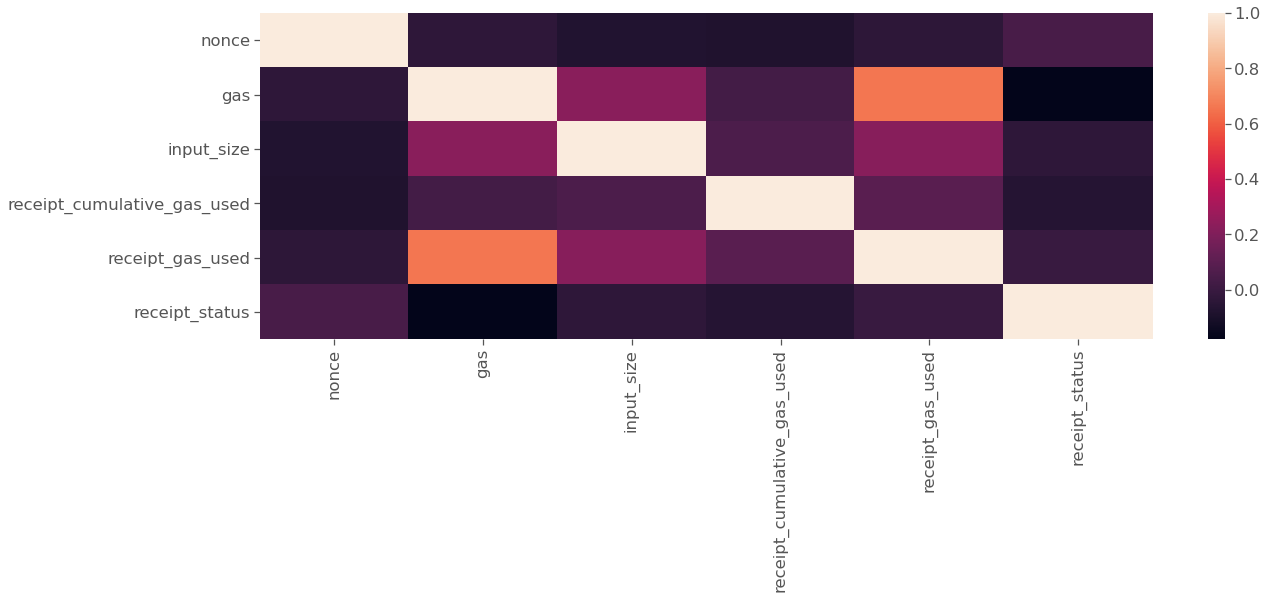

In [34]:
txSolution.heatmap()

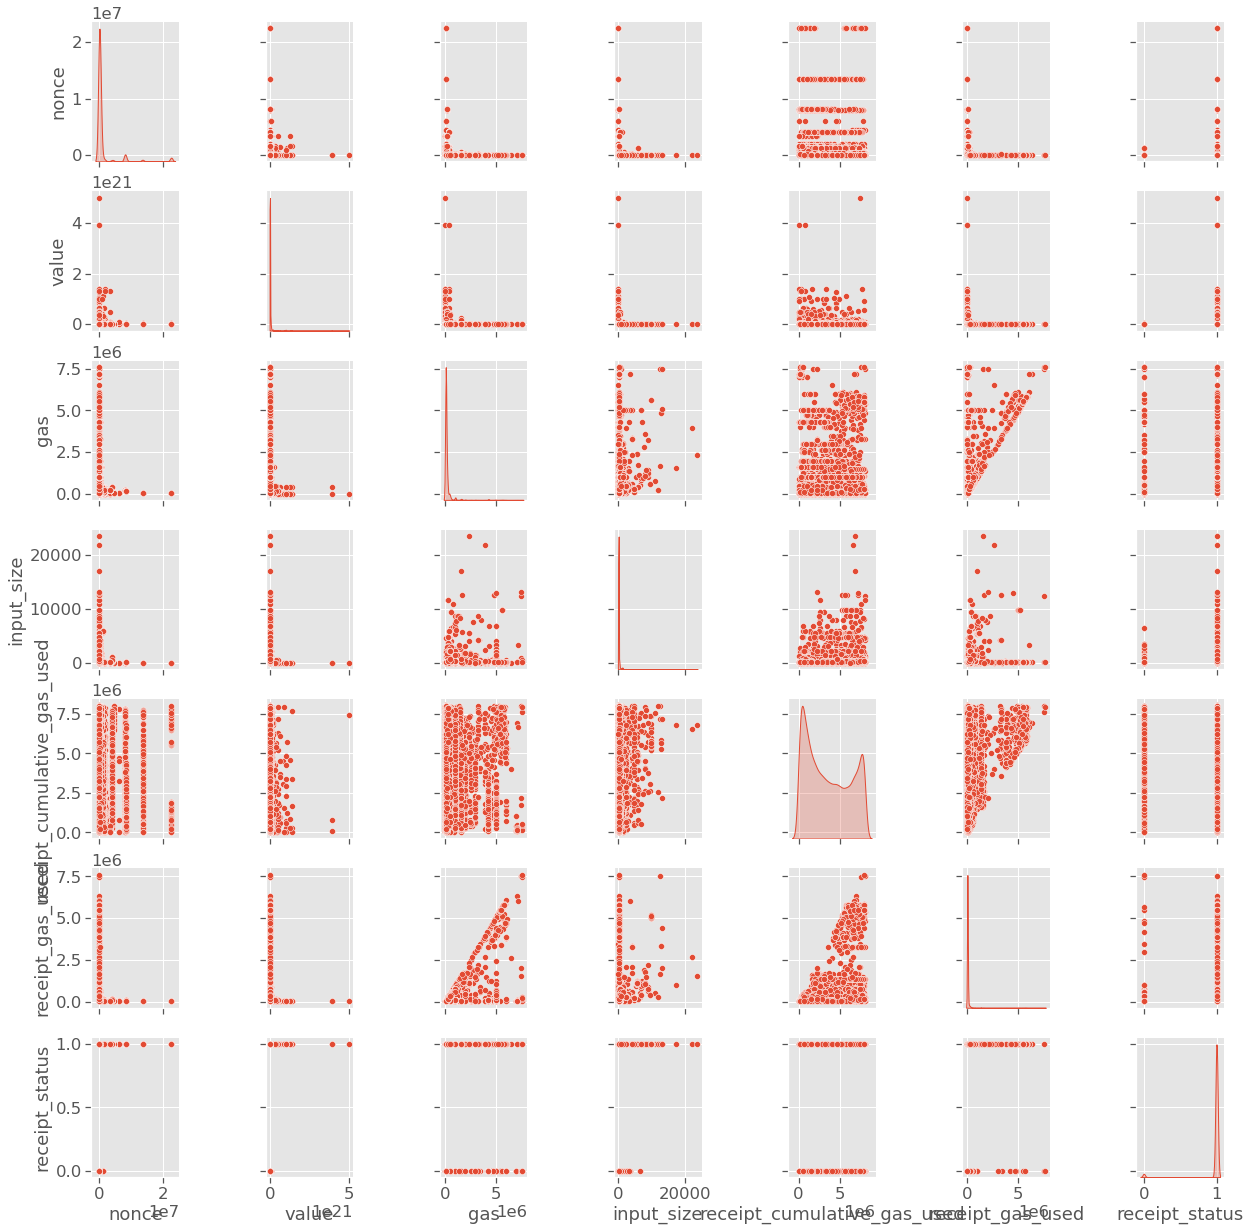

In [35]:
txSolution.pairplot()

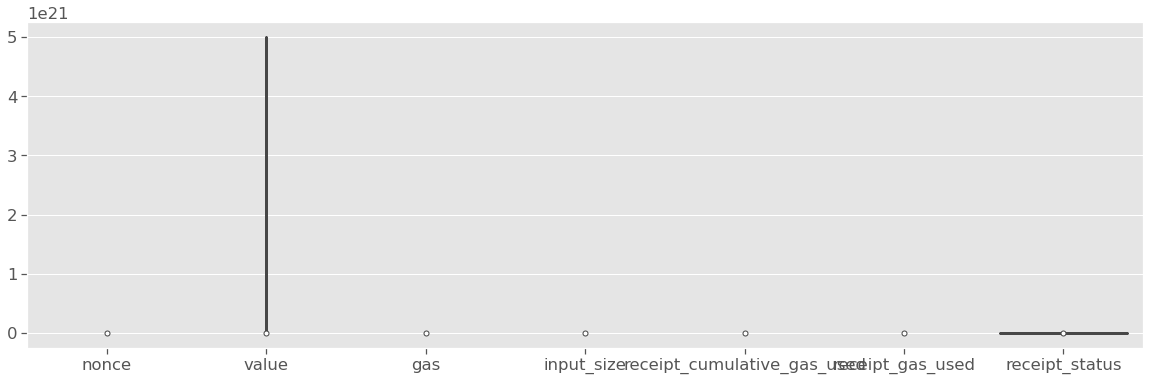

In [36]:
# before normalizing data
txSolution.violine(txSolution.df)

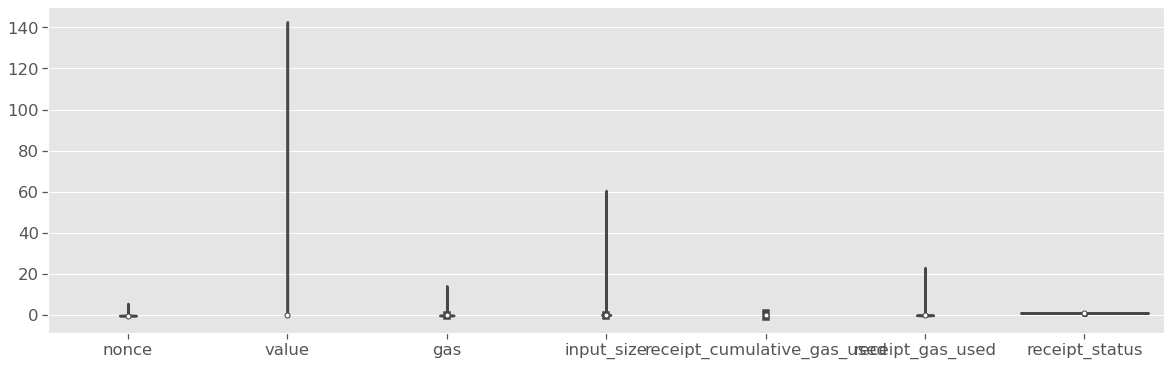

In [37]:
# after normalizing data
txSolution.violine(txSolution.normalized_df)

In [38]:
txSolution.normalized_df.head(5)

,nonce,value,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_status
0,-0.289928,-0.035844,0.636156,1.811435,0.498252,0.804133,1.0
1,-0.291726,-0.050724,2.495527,-0.173957,-0.228460,0.015011,0.0
2,-0.291639,-0.050724,-0.109883,1.480536,0.905942,0.036023,1.0
3,-0.291775,-0.050724,-0.266071,-0.008508,-0.923917,-0.145304,1.0
4,-0.290859,-0.050225,2.332759,-0.008508,0.032662,2.645418,1.0


### Transaction Status Feature Engineering
##### Unsupervised Analysis and Dimention Reduction(Kmean and PCA) of Transaction Status Data

range(0, 6)
[[-0.10663392 -0.01893139  0.64103209  0.37649542  0.13564388  0.64591068]
 [ 0.6971291   0.0802462   0.20261209 -0.15604327 -0.64925465  0.14366215]
 [-0.22159972  0.96856132  0.01270335 -0.00406723 -0.11215348  0.00512011]
 [ 0.55903719  0.21042386  0.02282317 -0.31163915  0.73127727  0.10388896]
 [ 0.37549355  0.10392589 -0.22805564  0.85829606  0.08824326 -0.22745467]
 [ 0.00397621  0.00351115  0.70380008 -0.00969859  0.07026683 -0.706828  ]]


,nonce,value,gas,input_size,receipt_cumulative_gas_used,receipt_gas_used,receipt_status
0,7293,521879878084684100,515152,842,4843844,334592,1
1,197,0,1500000,74,2965249,75008,0
2,539,0,120000,714,5897749,81920,1
3,4,0,37272,138,1167449,22272,1
4,3617,17475000000000000,1413787,138,3640266,940288,1
...,...,...,...,...,...,...,...
85019,1867,0,79102,138,4022555,52735,1
85020,1340,0,279319,330,7885324,184319,1
85021,1341,0,279319,330,7473971,184319,1
85022,1342,0,279319,330,7842545,184319,1


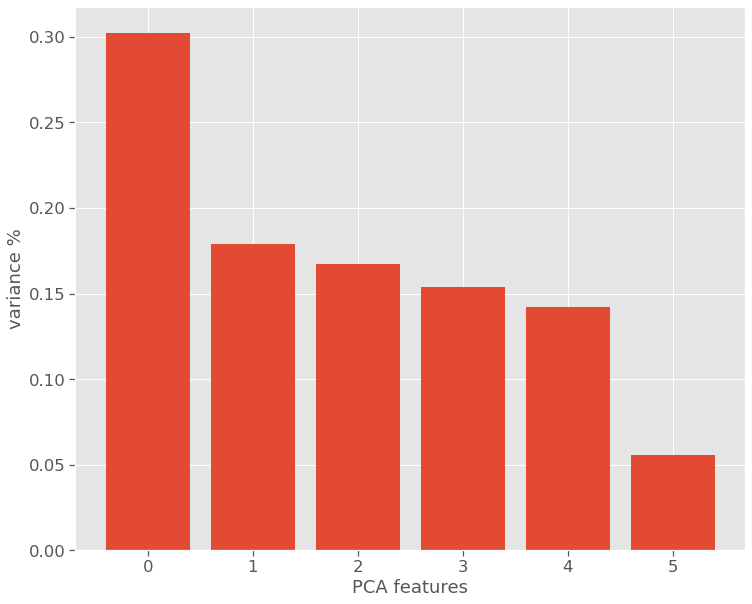

In [39]:
txSolution._featureEngineering()

<b>Above, we see the first five PCA components have the most variance. Therefor, we only take the first five features</b>

In [40]:
print(txSolution.PCA_components.shape)
print(txSolution.labels.shape)

(85024, 6)
(85024,)


<b>For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters.</b>

Text(0, 0.5, 'PCA 2')

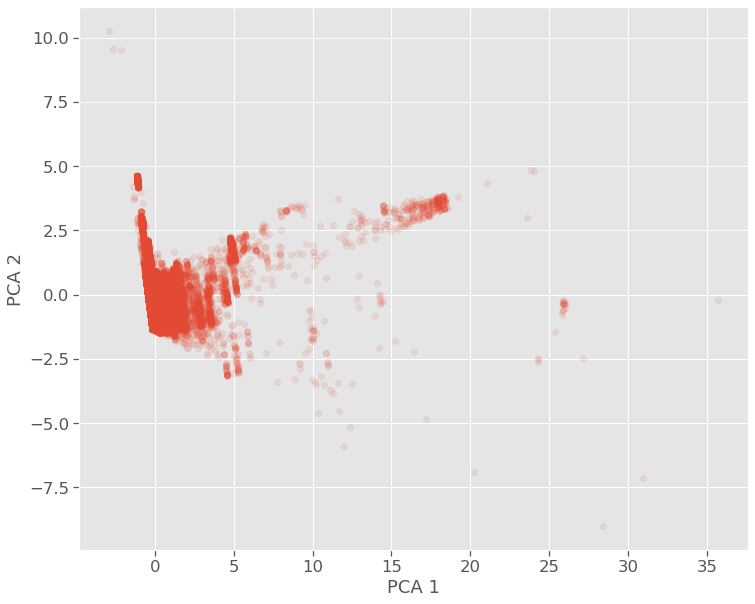

In [41]:
plt.scatter(txSolution.PCA_components[0], txSolution.PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

<b>From PCA results, the first 5 features dominate the labels variances. We will reduce dimention from 6 features to 5.</b>

In [42]:
txSolution.normalized_df = txSolution.normalized_df.iloc[:, :5]
txSolution.normalized_df['receipt_status'] = txSolution.labels

### Split Transaction Data into Train, Validate and Test 

##### Concepts: optimizers selection (https://www.deeplearning.ai/ai-notes/optimization/)

[-0.13981085 -0.02268558  0.55226266  0.10957757  0.1875932 ]


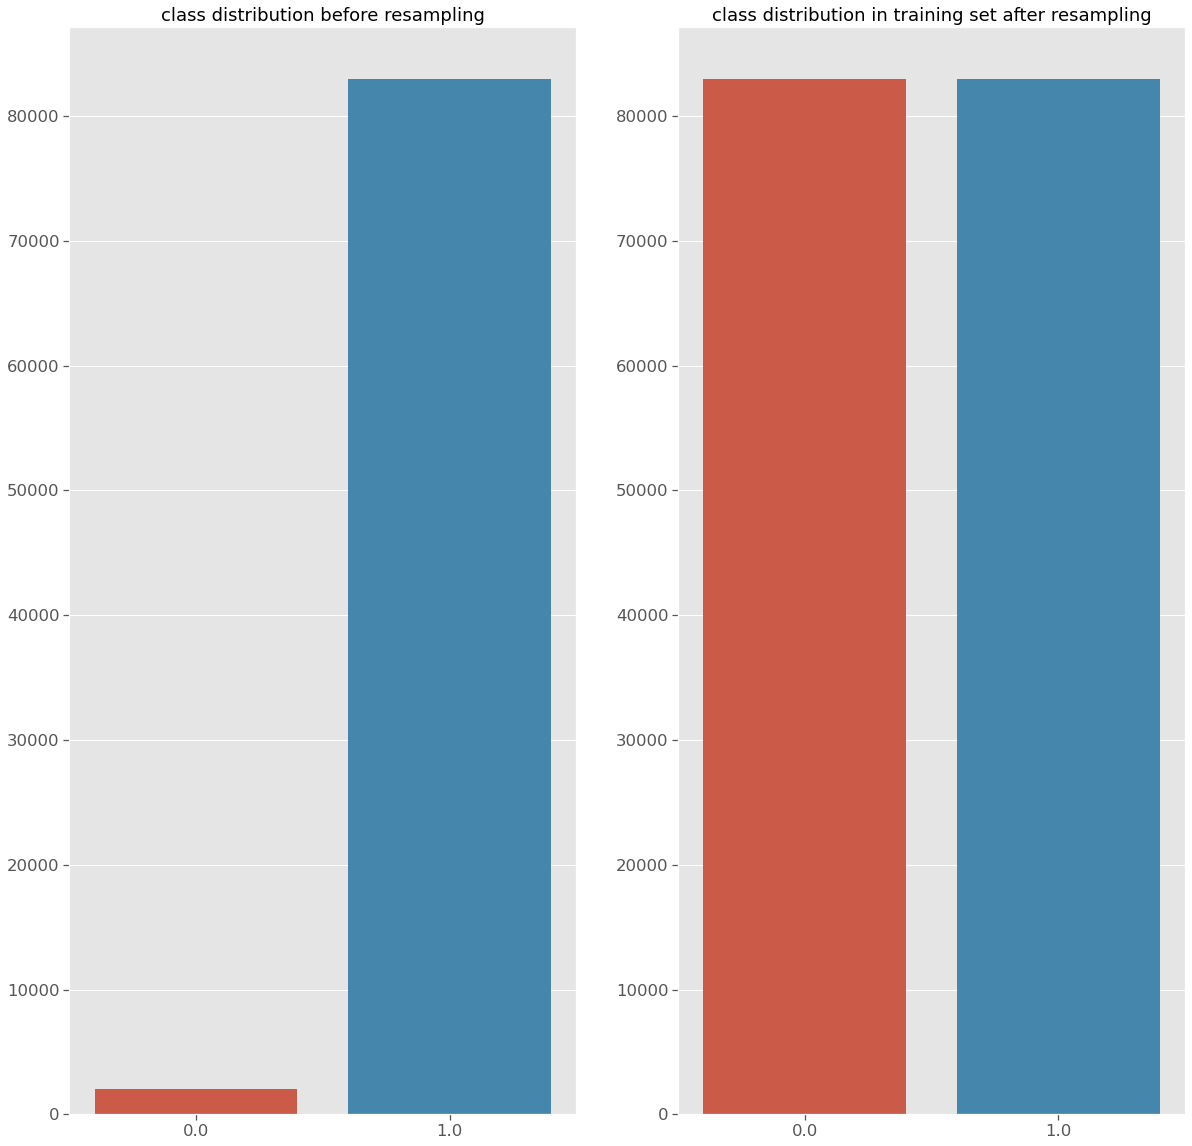

In [43]:
#because the dataset is imbalanced, we need to resample it
x_train, x_validate, x_test, y_train, y_validate, y_test, normalizer = txSolution.resampling(txSolution.normalized_df, 'receipt_status')

<p>Look at the data distribution
Next compare the distributions of the positive and negative examples over a few features. Good questions to ask yourself at this point are:</p>

### Transaction Status Model Training

In [44]:
print(x_train.shape)
print(y_train.shape)

(99570, 5)
(99570,)


### Build Transaction Status Model A

In [45]:
txSolution._buildModelA()

MLPClassifier(max_iter=20)

### Evaluate Transaction Model A

ML model:  MLPClassifier
---
tn, fp, fn, tp: {} 22479 4014 6722 19889
---
Accuracy: {} 0.7978306718891233
---
Precision: {} 0.8009368460750446
---
loss: {} 0.20216932811087676
---
mean_squared_error: {} 0.20216932811087676
---
Recall: {} 0.7979429863032377
---
F1 score: {}  0.797348619071657
---
ROC Curve, AUC =: {} 0.80
---


,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479,4014,6722,19889,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


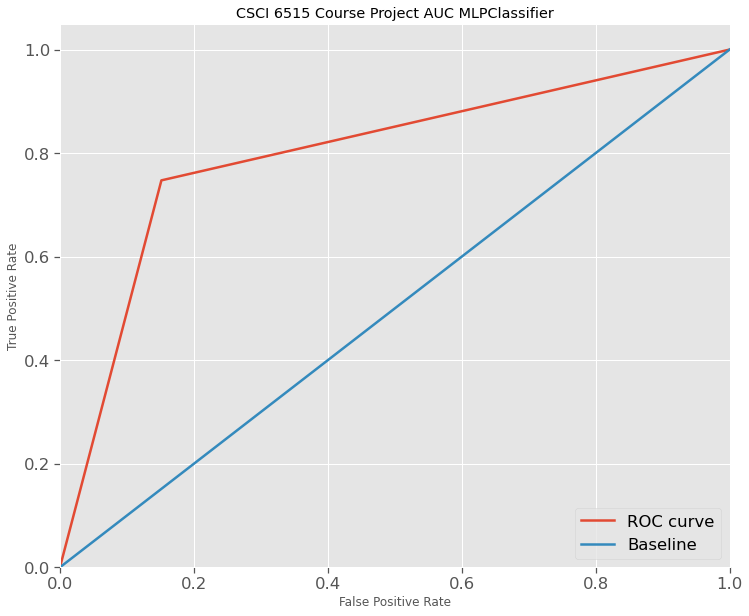

In [46]:
txSolution._modelA_evaluation()

#### Save Transaction Model A and Diagram

In [47]:
pickle.dump(txSolution.model_A, open('models/6515-project-transaction-model-A.sav', 'wb'))

### Build Transaction Status Model B

<h5>Concepts: Dense layer: A linear operation in which every input is connected to every output by a weight (so there are n_inputs * n_outputs weights - which can be a lot!). Generally followed by a non-linear activation function<br/>
Convolutional layer: A linear operation using a subset of the weights of a dense layer. Nearby inputs are connected to nearby outputs (specifically - a convolution 802 ). The weights for the convolutions at each location are shared. Due to the weight sharing, and the use of a subset of the weights of a dense layer, there’s far less weights than in a dense layer. Generally followed by a non-linear activation function<br/>
Pooling layer: Replace each patch in the input with a single output, which is the maximum (can also be average) of the input patch<br/>
Normalisation layer: Scale the input so that the output has near to a zero mean and unit standard deviation, to allow for faster and more resilient training</h5>

In a neural network, numeric data points, called inputs, are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.<br/>



The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold. Or it can be a transformation that maps the input signals into output signals that are needed for the neural network to function.

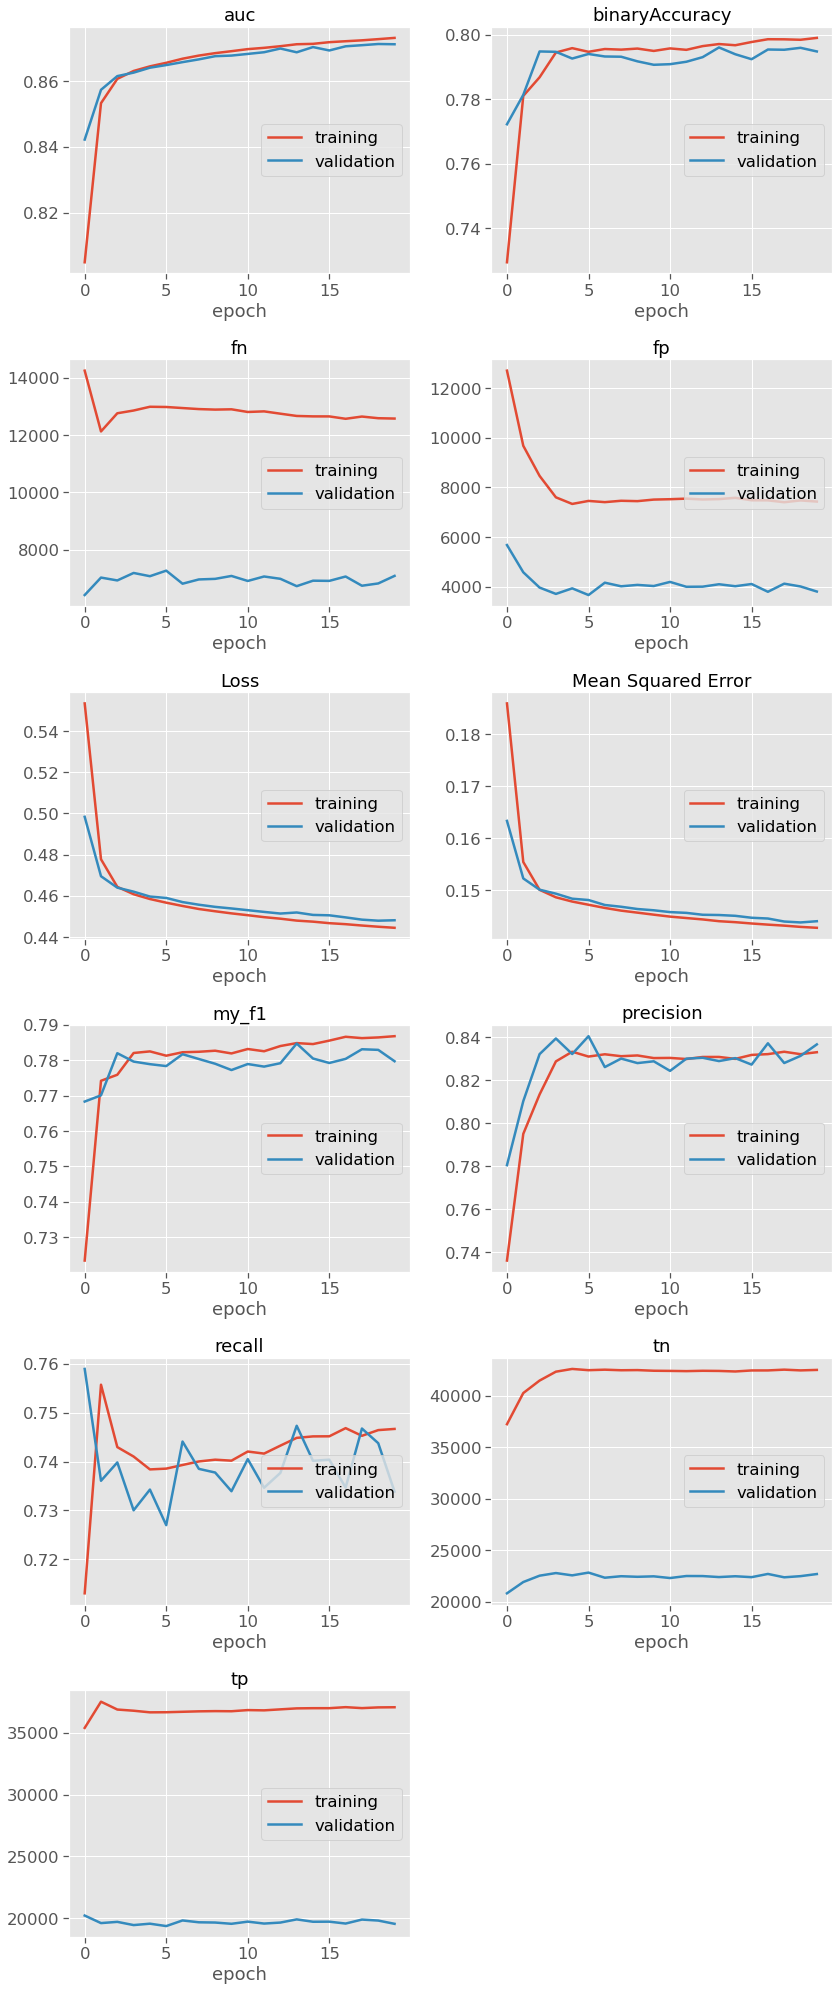

auc
	training         	 (min:    0.805, max:    0.873, cur:    0.873)
	validation       	 (min:    0.842, max:    0.871, cur:    0.871)
binaryAccuracy
	training         	 (min:    0.729, max:    0.799, cur:    0.799)
	validation       	 (min:    0.772, max:    0.796, cur:    0.795)
fn
	training         	 (min: 12128.000, max: 14251.000, cur: 12578.000)
	validation       	 (min: 6414.000, max: 7266.000, cur: 7083.000)
fp
	training         	 (min: 7336.000, max: 12697.000, cur: 7431.000)
	validation       	 (min: 3671.000, max: 5682.000, cur: 3812.000)
Loss
	training         	 (min:    0.445, max:    0.553, cur:    0.445)
	validation       	 (min:    0.448, max:    0.498, cur:    0.448)
Mean Squared Error
	training         	 (min:    0.143, max:    0.186, cur:    0.143)
	validation       	 (min:    0.144, max:    0.163, cur:    0.144)
my_f1
	training         	 (min:    0.723, max:    0.787, cur:    0.787)
	validation       	 (min:    0.768, max:    0.785, cur:    0.780)
precision
	traini

In [48]:
#binary classification
#optional utilize KerasClassifier To get a bona fide scikit estimator 

clf = KerasClassifier(txSolution._buildModelB, optimizer="adam", loss_fn="binary_crossentropy", n_features=5, metrics = txSolution.METRICS, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1)
clf.fit(x_train, y_train, validation_data=(x_validate, y_validate),
          callbacks=[PlotLossesKeras()])
# clf.fit(x_train, y_train)

<h5>concepts: An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large).</h5>

### Evaluate Transaction Model B

Epoch 1/20
332/332 [==============================] - 1s 4ms/step - loss: 0.5563 - tp: 53732.0000 - fp: 15342.0000 - tn: 61069.0000 - fn: 22531.0000 - binaryAccuracy: 0.7519 - precision: 0.7779 - recall: 0.7046 - auc: 0.8275 - my_f1: 0.7140 - mse: 0.1719
Epoch 2/20
332/332 [==============================] - 1s 4ms/step - loss: 0.4815 - tp: 37715.0000 - fp: 9958.0000 - tn: 39960.0000 - fn: 11937.0000 - binaryAccuracy: 0.7801 - precision: 0.7911 - recall: 0.7596 - auc: 0.8531 - my_f1: 0.7744 - mse: 0.1565
Epoch 3/20
332/332 [==============================] - 1s 4ms/step - loss: 0.4653 - tp: 37076.0000 - fp: 8678.0000 - tn: 41240.0000 - fn: 12576.0000 - binaryAccuracy: 0.7865 - precision: 0.8103 - recall: 0.7467 - auc: 0.8607 - my_f1: 0.7768 - mse: 0.1504
Epoch 4/20
332/332 [==============================] - 1s 4ms/step - loss: 0.4607 - tp: 36899.0000 - fp: 7800.0000 - tn: 42118.0000 - fn: 12753.0000 - binaryAccuracy: 0.7936 - precision: 0.8255 - recall: 0.7432 - auc: 0.8635 - my_f1: 0.78

,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479,4014,6722,19889,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,22557,3936,6755,19856,0.798678,0.834566,0.746158,0.781808,0.876057,0.141215
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


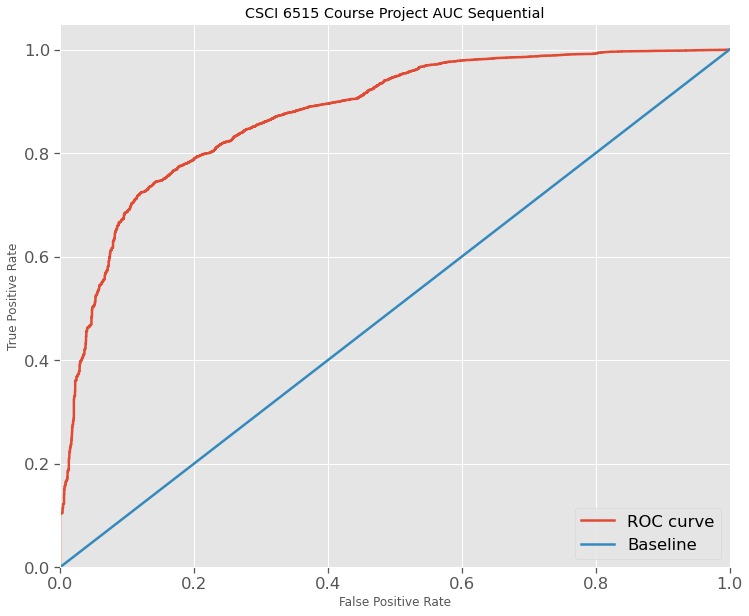

In [49]:
txSolution._buildModelB("adam", "binary_crossentropy", 5)
txSolution._modelB_evaluation()

In [50]:
# visulaize the model
txSolution.model_B.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                360       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


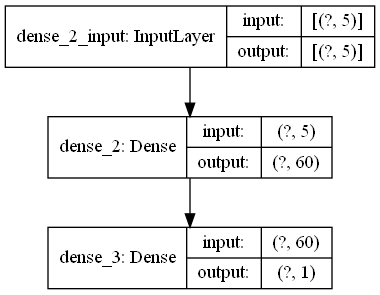

In [51]:
plot_model(txSolution.model_B, 'models/6515_project_transaction_status_model_B_baseline.png', show_shapes=True)

### Compare Transaction Status Model A and Model B baseline

In [52]:
txSolution.performances

,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479,4014,6722,19889,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,22557,3936,6755,19856,0.798678,0.834566,0.746158,0.781808,0.876057,0.141215
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
txSolution.performances.fillna(0)

,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479.0,4014.0,6722.0,19889.0,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,22557.0,3936.0,6755.0,19856.0,0.798678,0.834566,0.746158,0.781808,0.876057,0.141215
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0,0.000000


0.80,0.8760573267936707
[0.8        0.87605733]
0
Legitimate Transactions Detected (True Negatives):  22479
Legitimate Transactions Incorrectly Detected (False Positives):  4014
Fraudulent Transactions Missed (False Negatives):  6722
Fraudulent Transactions Detected (True Positives):  19889
Total Fraudulent Transactions:  26611
1
Legitimate Transactions Detected (True Negatives):  22557.0
Legitimate Transactions Incorrectly Detected (False Positives):  3936.0
Fraudulent Transactions Missed (False Negatives):  6755.0
Fraudulent Transactions Detected (True Positives):  19856.0
Total Fraudulent Transactions:  26611.0


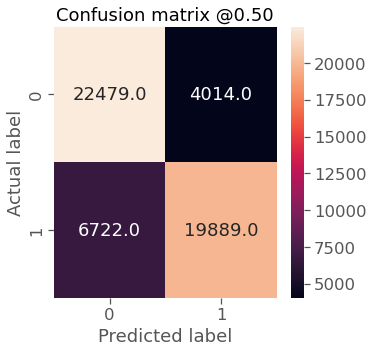

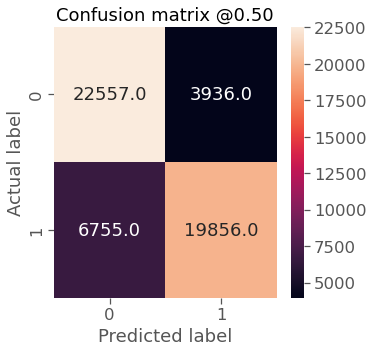

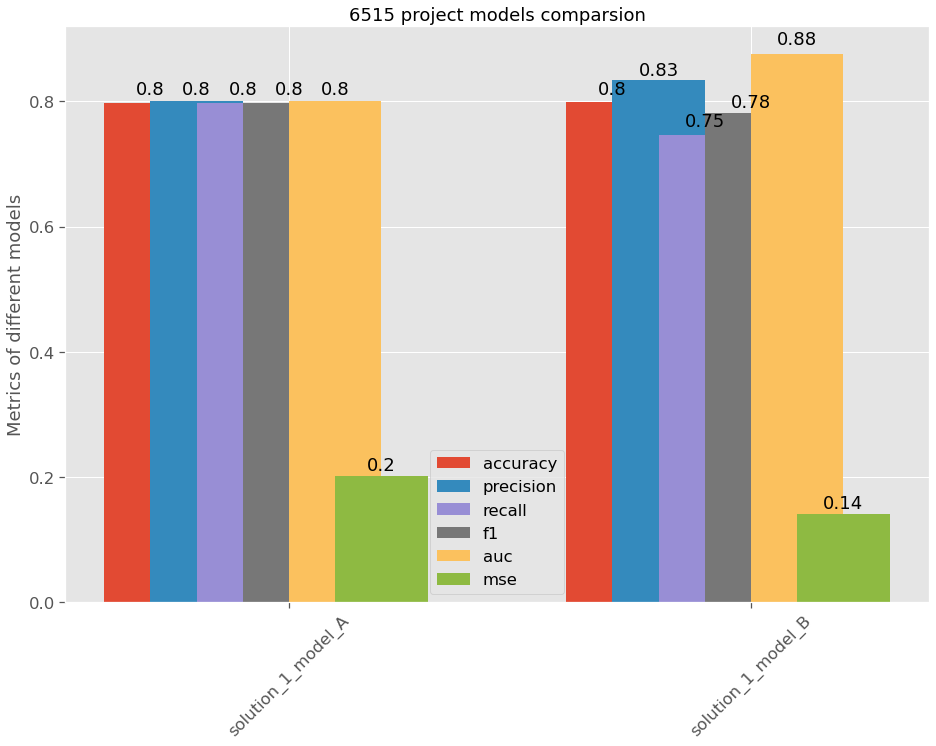

,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479,4014,6722,19889,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,22557,3936,6755,19856,0.798678,0.834566,0.746158,0.781808,0.876057,0.141215
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
txSolution._modelComparsion(2)

#### Save Transaction Model B and Diagram

In [55]:
txSolution.model_B.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 60)                360       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 61        
Total params: 421
Trainable params: 421
Non-trainable params: 0
_________________________________________________________________


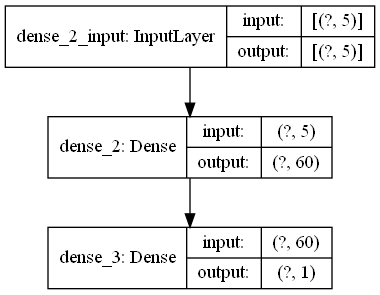

In [56]:
plot_model(txSolution.model_B, 'models/6515-project-transaction-model-B.png', show_shapes=True)

In [57]:
#save and load model
txSolution.model_B.save('models/6515_project_blockchain_status_model_B.h5')

<h4>based on the ANN model evaluation, we can see the model B baseline AUC can reach 0.89 which is better than model A. And Model B baseline MSE is lower than Model A. </h4>
<h5>Therefore, we should consider consider choose model B over model A regarding this imbalanced data.</h5>

### Build Transaction Status Optimized Model C
#### Transaction Status Model Optimization

#### Optimization method 1: More hidden layers, wider layers, add dropout layer

In [58]:
txSolution._buildOptimizedModelC("adam", 1, "sigmoid", "binary_crossentropy", 5, txSolution.METRICS)

In [59]:
txSolution.model_C.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
__________________________________________________

<h4> Optimization method 2: Overcome the underfiting bias </h4>
<p>

Set the correct initial bias.
These initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that (See: A Recipe for Training Neural Networks: "init well"). This can help with initial convergence.

With the default bias initialization the loss should be about math.log(2) = 0.69314</p>
<p>The correct bias to set can be derived from:
p0 = pos / (pos+neg) = 1 / (1 + e powered (-b0))
b0 = -log e (pos/neg)</p>

<h4>Optimization method 3: Checkpoint the initial weights</h4>
<p>To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.</p>

#### Optimization method 4: Early stopping
Stop ongoing epoch training as soon as watched metric value reach the peak.

#### Next, I pipelined all the optimization methods to make them work in a streamline.

In [60]:
model_C_history = txSolution._optimizeModelPipeline()

Examples:
    Total: 99570
    Positive: 49652 (49.87% of total)

Epoch 1/20
332/332 [==============================] - 6s 19ms/step - loss: 0.5123 - tp: 56336.0000 - fp: 14462.0000 - tn: 61949.0000 - fn: 19927.0000 - binaryAccuracy: 0.7748 - precision: 0.7957 - recall: 0.7387 - auc: 0.8473 - my_f1: 0.7544 - mse: 0.1582 - val_loss: 0.4579 - val_tp: 19520.0000 - val_fp: 3917.0000 - val_tn: 22576.0000 - val_fn: 7091.0000 - val_binaryAccuracy: 0.7927 - val_precision: 0.8329 - val_recall: 0.7335 - val_auc: 0.8615 - val_my_f1: 0.7789 - val_mse: 0.1480
Epoch 2/20
332/332 [==============================] - 4s 11ms/step - loss: 0.4694 - tp: 36785.0000 - fp: 8341.0000 - tn: 41577.0000 - fn: 12867.0000 - binaryAccuracy: 0.7870 - precision: 0.8152 - recall: 0.7409 - auc: 0.8572 - my_f1: 0.7755 - mse: 0.1513 - val_loss: 0.4461 - val_tp: 19687.0000 - val_fp: 3875.0000 - val_tn: 22618.0000 - val_fn: 6924.0000 - val_binaryAccuracy: 0.7966 - val_precision: 0.8355 - val_recall: 0.7398 - val_auc: 0.8742

<h5>Check training history </h5>

In [61]:
math.ceil(len(model_C_history.history.keys()) / 2)

11

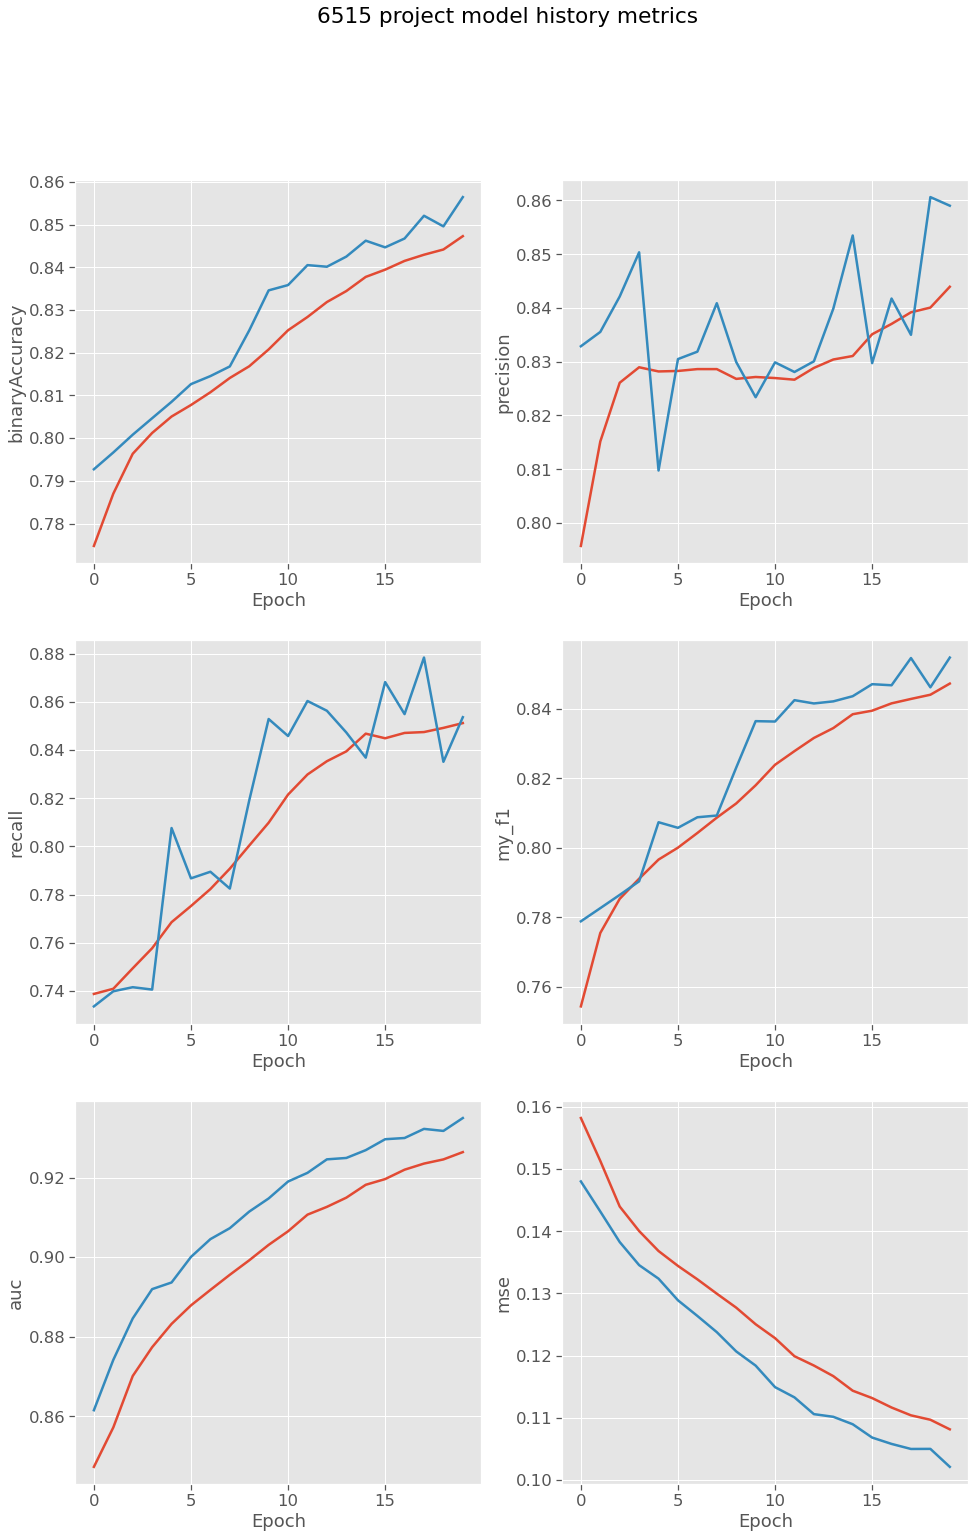

In [62]:
plot_history_metrics(model_C_history)

<h4>The plots shows when we train more, we can achieve the better performance. The AUC can reach 0.93 when training 20 times, and mse decrease to 0.086 at the end.</h4>

### Evaluate Transaction Model C
<b>Evaluate your model on the test dataset and display the results for the metrics you created above.</b>

1660/1660 [==============================] - 5s 3ms/step - loss: 0.3249 - tp: 22716.0000 - fp: 3728.0000 - tn: 22765.0000 - fn: 3895.0000 - binaryAccuracy: 0.8565 - precision: 0.8590 - recall: 0.8536 - auc: 0.9350 - my_f1: 0.8519 - mse: 0.1021
loss :  0.3249111473560333
tp :  22716.0
fp :  3728.0
tn :  22765.0
fn :  3895.0
binaryAccuracy :  0.8564515113830566
precision :  0.859022855758667
recall :  0.8536319732666016
auc :  0.9349615573883057
my_f1 :  0.8519452810287476
mse :  0.10212723910808563

ROC Curve, AUC =: {} 0.93
---


,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479,4014,6722,19889,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,22557,3936,6755,19856,0.798678,0.834566,0.746158,0.781808,0.876057,0.141215
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,22765,3728,3895,22716,0.856452,0.859023,0.853632,0.851945,0.934962,0.102127


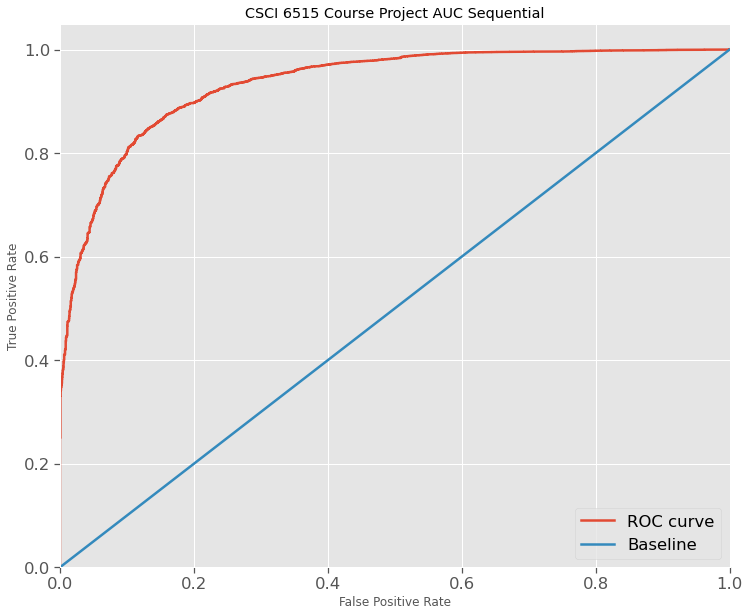

In [63]:
txSolution._modelC_optimized_evaluation()

### Compare Transaction Status Model A, B and C

0.80,0.8760573267936707,0.9349615573883057
[0.8        0.87605733 0.93496156]
0
Legitimate Transactions Detected (True Negatives):  22479
Legitimate Transactions Incorrectly Detected (False Positives):  4014
Fraudulent Transactions Missed (False Negatives):  6722
Fraudulent Transactions Detected (True Positives):  19889
Total Fraudulent Transactions:  26611
1
Legitimate Transactions Detected (True Negatives):  22557.0
Legitimate Transactions Incorrectly Detected (False Positives):  3936.0
Fraudulent Transactions Missed (False Negatives):  6755.0
Fraudulent Transactions Detected (True Positives):  19856.0
Total Fraudulent Transactions:  26611.0
2
Legitimate Transactions Detected (True Negatives):  22765.0
Legitimate Transactions Incorrectly Detected (False Positives):  3728.0
Fraudulent Transactions Missed (False Negatives):  3895.0
Fraudulent Transactions Detected (True Positives):  22716.0
Total Fraudulent Transactions:  26611.0


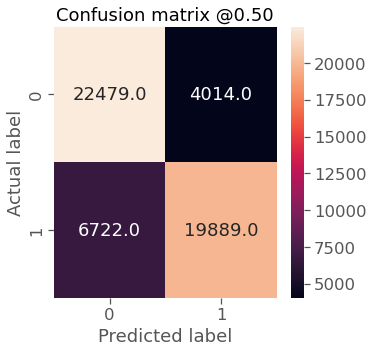

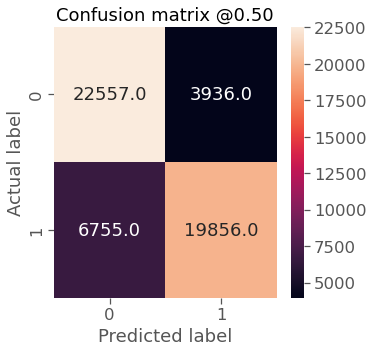

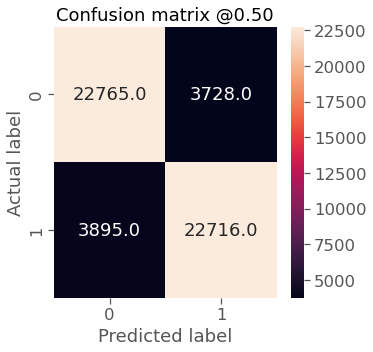

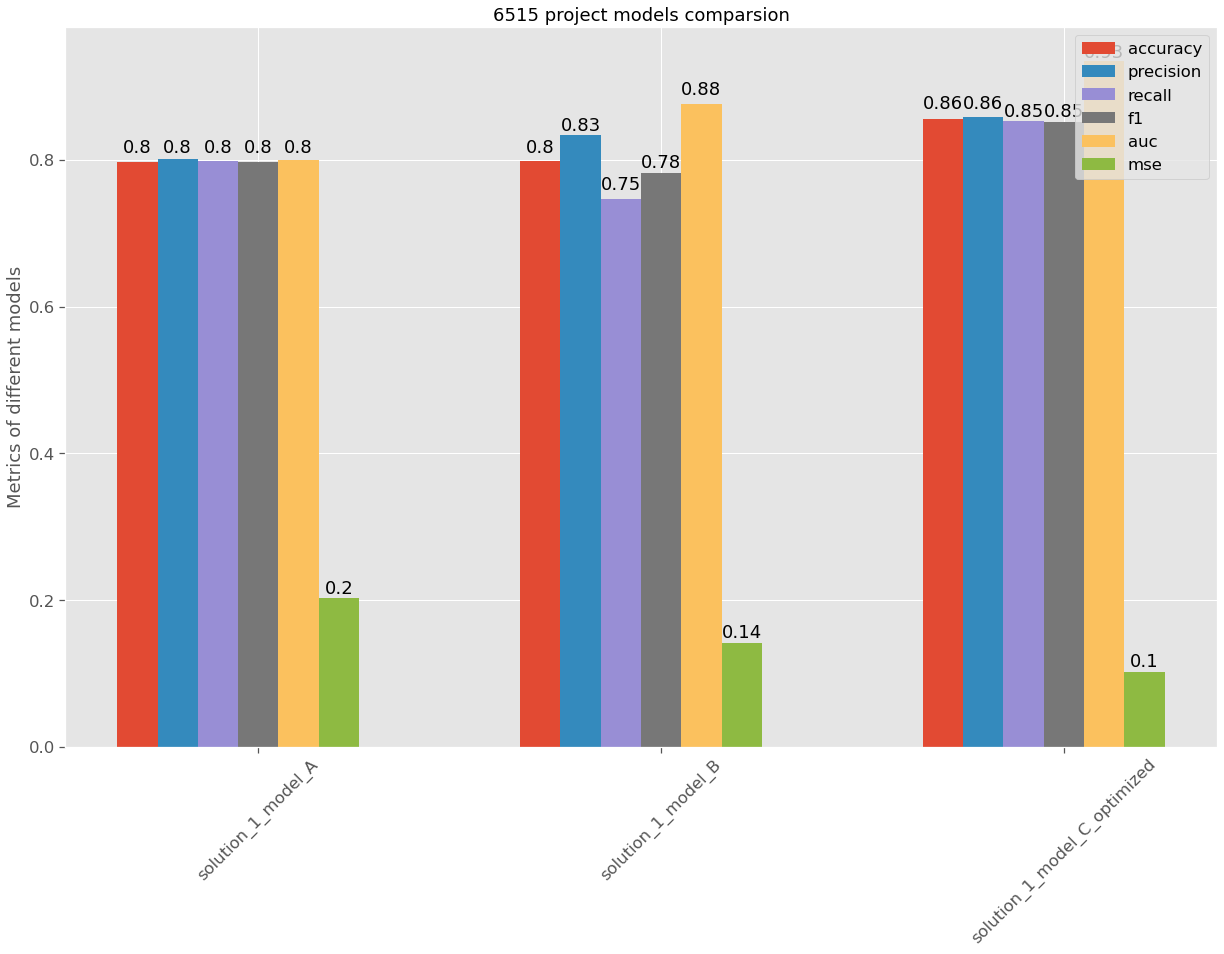

,model,model_name,tn,fp,fn,tp,accuracy,precision,recall,f1,auc,mse
0,solution_1_model_A,transaction_status_sklearn_MLP,22479,4014,6722,19889,0.797831,0.800937,0.797943,0.797349,0.80,0.202169
1,solution_1_model_B,transaction_status_tensorflow_baseline,22557,3936,6755,19856,0.798678,0.834566,0.746158,0.781808,0.876057,0.141215
2,solution_1_model_C_optimized,transaction_status_tensorflow_optimized,22765,3728,3895,22716,0.856452,0.859023,0.853632,0.851945,0.934962,0.102127


In [64]:
txSolution._modelComparsion(3, 0.1, 0.1, 16, 10)

#### Save Transaction Model C and Diagram

In [65]:
txSolution.model_C.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               1200      
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 41,601
Trainable params: 41,601
Non-trainable params: 0
__________________________________________________

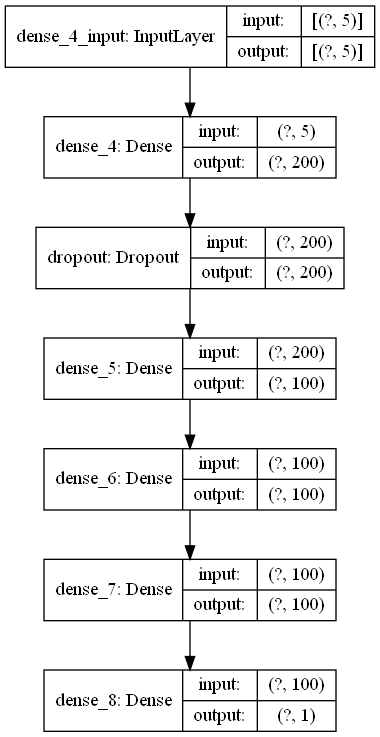

In [66]:
plot_model(txSolution.model_C, 'models/6515-project-transaction-model-C.png', show_shapes=True)

In [67]:
#save and load model
txSolution.model_C.save('models/6515_project_blockchain_status_model_C.h5')

### Extract Another Test Data to Validate Transaction Status Model 

In [68]:
txSolution.x_test_resample

array([[-0.29172215, -0.05072351,  0.06003552, -0.0085079 ,  0.48035672],
       [ 5.3956265 , -0.04501428, -0.24204099, -0.36008775,  1.664081  ],
       [-0.2735445 , -0.04121228, -0.16652186, -0.36008775,  0.53823   ],
       ...,
       [-0.29065925, -0.05072351, -0.2638528 , -0.0085079 ,  1.5956459 ],
       [-0.29177588, -0.04502133, -0.29679236, -0.36008775, -0.29304346],
       [-0.2917736 , -0.05072351, -0.22316122, -0.0085079 ,  1.0048708 ]],
      dtype=float32)

In [69]:
print(txSolution.x_test_resample.shape)
print(txSolution.y_test_resample.shape)

(13276, 5)
(13276,)


In [70]:
#take a random record for validating 
txSolution.x_test_resample[1000:1001,:]

array([[-0.29175332, -0.05072351, -0.22316122, -0.0085079 ,  1.3845593 ]],
      dtype=float32)

In [71]:
y_actual_single = txSolution.y_test_resample[1000:1001]
y_actual_single

array([1.])

In [72]:
# load the model from file
from tensorflow.keras.models import load_model
tx_status_model = load_model('models/6515_project_blockchain_status_model_C.h5', custom_objects={'my_f1': my_f1})
# make a prediction
yhat = tx_status_model.predict_classes(txSolution.x_test_resample[1000:1001,:], batch_size=BATCH_SIZE)
print('Predicted: %.3f' % yhat)
print('actual: %.3f' % y_actual_single)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted: 1.000
actual: 1.000


<b>Above the single predictionresult is quite well matched up</b>

<b>Prediction above indicate the model can actually predicte very well on the label (transaction status)</b>

### Conclusion: Generalize guildline of predicting Transaction Status for Enduser
#### Based on the experience of this research, we are proposing the guideline for the end-user is as following: 
##### 1)	Step one: 
###### We shall identify the problem within the desired business domain. We need to extract the Ethereum Data from BigQuery;  Then, we need to utilize data preprocessing techniques on the sample data. For instance, I identified there are several issues I can work on, such as:
•	Transaction Status Analytics (Binary-Classification): learning for prediction Ethereum transaction status.<br/>
•	Error Types Analytics (Multi-Classification): Learning for Prediction error types of Ethereum Transaction.<br/>
##### 2)	Step two:
###### For each problem we identified, we shall consider a couple of possible solutions. Then, we need to choose a more efficient approach to solve the problem. For instance, the datasets I chose is about big data analytics. Therefore, deep learning with a neural network is the appropriate choice. However, there are many deep learning libraries on the market. We need to choose wisely based on the comparisons of advantages and disadvantages. For instance, I came up with solutions with three possible approaches, such as:
•	SKlearn (e.g., Random forest tree, SVM): the advantages include easy to train and build, easy to tune up the hypermeters like depth, iteration. The disadvantages include Less interpretation, less accuracy on BIg data, less efficiency on Big Data.<br/>
•	Keras: the advantages include more efficiency and accuracy on big data training, GPU, and CPU. Less learning curve compared with PyTorch. The disadvantages include a higher learning curve compared with SKLearn.<br/>
•	PyTorch: The advantages include more specific customization of neural networking, maximize the potential power of GPU. The disadvantages include the highest learning curve, need more testing on tuning up hyperparameters.<br/>
After careful comparison between those solutions, we should choose the best solution with convincible reasons.
##### 3)	Step three:
###### Based on analyzing the solutions discussed in Step two, we need to create a high-level design with a recommended data flow diagram. For a good design, a dataset explanatory understanding and explanation should take place. At this point, the visualization can kick in to help us understand datasets better. Therefore, we can follow the practical design to implement our solution. For instance, I decided to choose Tensorflow Keras Classifiers (Binary and Multi-classification) to solve each topic. And I started with a design diagram, requirement specification, and data flow details discussed in previous sections. At this step, we might start with feature engineering on preprocessed datasets for the most appropriate features of solution model training. 
##### 4)	Step four:
###### At this step, we can actually build our models and train them with the sample data. More importantly, we need to utilize the rich metrics [Fig 14. Metrics Used in Project] to evaluate my models for comparison. However, depending on the model classification types, we shall choose the most suitable metrics. For instance, I chose the confusion matrix, F1 score, AUC, precision, and recall for binary classification, while I chose accuracy, loss, and customized F1 for multiclass. Besides, I employed visualization for the statistical results to make the comparison more understandable. Moreover, I give possible optimization solutions for Keras models, such as early dropping, weight, and bias initialization.
##### 5)	Step five:
###### Document experiences during the solution to defined problems. Note down the lesson learn from the model training, evaluation, and optimization process. Save the selection model for similar problems in the future. 



# Transaction Error Types Analytics (Multiclass Classification)

* [Transaction Error Types Data Flow chart and explanation](#Transaction-Error-Types-Data-Flow-chart-and-explanation)
* [Transaction Error Types Data Extraction](#Transaction-Error-Types-Data-Extraction)
* [Transaction Error Types Data Preprocessing](#Transaction-Error-Types-Data-Preprocessing)
* [Transaction Error Types Feature Engineering](#Transaction-Error-Types-Feature-Engineering)
* [Split Transaction Error Types Data into Train, Validate and Test](#Split-Transaction-Error-Types-Data-into-Train,-Validate-and-Test)
* ***[Build Transaction Error Types Model A](#Build-Transaction-Error-Types-Model-A)***
* [Evaluate Transaction Error Types Model A](#Evaluate-Transaction-Error-Types-Model-A)
* [Save Transaction Error Types Model A and Diagram](#Save-Transaction-Error-Types-Model-A-and-Diagram)
* ***[Build Transaction Error Types Model B](#Build-Transaction-Error-Types-Model-B)***
* [Evaluate Transaction Error Type Model B](#Evaluate-Transaction-Error-Types-Model-B)
* **[Compare Transaction Error Types Model A and Model B baseline](#Compare-Transaction-Error-Types-Model-A-and-Model-B-baseline)**
* [Save Transaction Error Types Model B and Diagram](#Save-Transaction-Error-Types-Model-B-and-Diagram)
* **[Build Transaction Error Types Optimized Model C](#Build-Transaction-Error-Types-Optimized-Model-C)**
* [Evaluate Transaction Error Types Model C](#Evaluate-Transaction-Error-Types-Model-C)
* **[Compare Transaction Error Types Model A, B and C](#Compare-Transaction-Error-Types-Model-A,-B-and-C)**
* [Save Transaction Error Types Model C and Diagram](#Save-Transaction-Error-Types-Model-C-and-Diagram)
* [Conclusion: Generalize guildline of predicting Transaction Error Types for Enduser](#Conclusion:-Generalize-guildline-of-predicting-Transaction-Error-Types-for-Enduser)


#### Transaction Error Types Data Flow chart and explanation

<img src="img/transaction-error-types.PNG" />

### I briefly illustrate each step:
##### 1, Problem definition and solutions; 
###### I choose the Ethereum Big Data extracting from BigQuery, and identified Blockchain developers / designers struggled with unpredcited transactions status and unclear root causes of the exceptions. Therefore, I built the model for predict the transaction status over blockchain and error types.
##### 2, Data extraction and preprocessing;
###### I extract Ethereum Big Data in real time for BigQuery. I did preprocessing on the data, such as missing value, data type transformation.. etc.
##### 3, Feature Engineering;
###### I analyzed and visualized the correlation of features; filtered out unrelated features such as block address, hashcode..; reduceing dimention with PCA..; etc.
##### 4, Model A and B buildup and Comparsion;
###### I built two different models for prediction. I evaluated model A and B with various metrics and made comparsion. I visualized results and chose model B baseline for optimization.
##### 5, Better model C optimization and retest with another test data;
###### I optimized performance for model B to model C. I made comparsion among A, B and C again and visualized results. I proved model A has better performance than model B and C (model C accuracy is better, however, the F1 score is lower than model A still).
#### Please note, the error types solution is using the different output activiation function, loss function and metrics other than transaction status solutioin. Because one is binary classification, another is multiclass classification.

In [73]:
class transactionErrorCodeSolutionGuildeline:
    def __init__(self):
        self.df = None
        self.normalized_df= None
        self.normalized_features = None
        self.labels = None
        self.PCA_components = None
        # test-split-sample data
        self.x_train = None
        self.x_validate = None
        self.y_train = None
        self.y_validate = None
        # extract from another time slot test data
        self.x_test = None
        self.y_test = None
        # rebalanced data
        self.x_train_resample = None
        self.x_validate_resample = None
        self.y_train_resample = None
        self.y_validate_resample = None
        self.x_test_resample = None
        self.y_test_resample = None
        # stored model a and b and optimized model a and b
        self.model_A = None
        self.model_A_o = None
        self.model_B = None
        self.model_C = None
        self.model_A_pred = None
        self.model_A_pred_o = None
        self.model_B_pred = None
        self.model_C_pred = None
        # record history of model A, B and C
        self.model_A_history = None
        self.model_B_history = None
        self.model_C_history = None
        # used for MLP first layer normalizer
        self.normalizer = None
        # records the solution 1 models evaluation results
        self.performances = pd.DataFrame(columns=['model', 'model_name', 'accuracy', 'f1', 'mse', 'loss']) 
        self.performances['model_name'] = ['error_code_sklearn_MLP', 'error_code_tensorflow_baseline','error_code_tensorflow_optimized']
        self.performances['model'] = ['solution_2_model_A', 'solution_2_model_B','solution_2_model_C_optimized']
        self.performances.fillna(0)
        self.metrics = [
            "accuracy", # evaluate multi-class classification
            multiclass_f1, #manually calculate f1 score
            keras_multiclass_loss,
            keras.metrics.MeanSquaredError(name='mse') # evalate loss
        ]
        #optimization parameters:
        self.initialBias = None
        self.initialWeigh = None
        self.earlyStopping = None
        #extract Big Query Data
        self._dataExtraction(traces_query)
    
    def _dataExtraction(self, query):
        self.query = query
        self.df = exeQuery(self.query)
        return self.df
        
    def _preprocessData(self):
        #data preprocessing
        # test our fancy streamline 
        # based on the concepts of each field, we can say ['transaction_hash', 'from_address', 'to_address', 'block_timestamp', 'block_number', 'block_hash'] are irrelavant with the targetted leabel 'gas_used'.
        # besides, 'error' is the result of transaction. they can not be used for prediction feature
        # value object, input_size float64 , trace_type object , call_type object, gas float64, error object
        self.df = self.df[['value', 'gas','call_type', 'trace_type', 'input_size','error']]
        self.df= self.df.dropna()
        self.df['value'] = ourLabelEncoder(self.df, 'value')
        trace_type = ourLabelEncoder(self.df, 'trace_type')
        call_type = ourLabelEncoder(self.df, 'call_type')
        self.df = self.customizedLabelEncoder(self.df)
        df = self.df[['value', 'input_size', 'gas', 'error']]
        self.normalized_df = stdScalar(df, 'error')
        self.normalized_df['trace_type'] = trace_type
        self.normalized_df['call_type'] = call_type
        return self.normalized_df
    
    #PCA dimention reduction of features
    def _featureEngineering(self):
        # we rank columns variance then visualize the results
        self.normalized_df = self.normalized_df[['value', 'gas','call_type','trace_type','input_size','error']]
        self.labels = self.normalized_df['error']
        self.normalized_features = self.normalized_df.drop(['error'], axis=1)
        pca = PCA(n_components=5)
        principalComponents = pca.fit_transform(self.normalized_features)
        # Plot the explained variances
        features = range(pca.n_components_)
        print(features)
        print(pca.components_)
        plt.bar(features, pca.explained_variance_ratio_)
        plt.xlabel('PCA features')
        plt.ylabel('variance %')
        plt.xticks(features)
        # Save components to a DataFrame
        self.PCA_components = pd.DataFrame(principalComponents)
        return self.df
    
    #defined customized label encoder
    def customizedLabelEncoder(self, df):
        from sklearn import preprocessing
        le = preprocessing.LabelEncoder()
        le.fit(['Bad instruction',
         'Bad jump destination',
         'Out of gas',
         'Reverted',
         'Stack underflow',
         'Unknow'])
        df['error'] = le.transform(df['error'].values)
        return df

    def _buildModelA(self):
        self.model_A = MLPClassifier(max_iter=EPOCH)
        self.model_A.fit(self.x_train_resample, self.y_train_resample)
        self.model_A_pred = self.model_A.predict(self.x_validate_resample)
        return self.model_A
    
    def _modelA_evaluation(self):
        accuracy, f1, mse, loss = print_multiclass_all_score(self.y_validate_resample, self.model_A_pred, self.model_A)
        self.performances.iloc[0]['accuracy'] = accuracy
        self.performances.iloc[0]['f1'] = f1
        self.performances.iloc[0]['mse'] = mse
        self.performances.iloc[0]['loss'] = loss
        return self.performances
        
    def _buildModelB(self, n_features, outputdim, metrics):
        # create model
        self.model_B = Sequential()
        self.model_B.add(Dense(60, activation='relu', input_shape=(n_features,)))
        self.model_B.add(Dense(outputdim, activation='softmax'))
        # Compile model
        self.model_B.compile(
                    loss='sparse_categorical_crossentropy',
                    optimizer='adam',
                    metrics=self.metrics,
                )        
        return self.model_B
    
    def _modelB_evaluation(self):
        # compile the model
        self.model_B.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= self.metrics)

        # fit the model
        history = self.model_B.fit(self.x_train_resample, self.y_train_resample, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1)

        # evaluate the model
        # tp, fp, tn, fn, accuracy, precision, recall, auc, mse = model.evaluate(x_validate, y_validate, verbose=1)
        baseline_results = self.model_B.evaluate(self.x_validate_resample, self.y_validate_resample, verbose=1)
        tmp_performance = {}
        for name, value in zip(self.model_B.metrics_names, baseline_results):
            tmp_performance[name] = value
            print(name, ': ', value)
        self.performances.iloc[1]['accuracy'] = tmp_performance['accuracy']
        self.performances.iloc[1]['f1'] = tmp_performance['multiclass_f1']
        self.performances.iloc[1]['mse'] = tmp_performance['mse']
        self.performances.iloc[1]['loss'] = tmp_performance['keras_multiclass_loss']
        self.model_B_pred = self.model_B.predict(self.x_validate_resample)
#         plot_ROC(self.y_validate_resample, self.model_B_pred, self.model_B.__class__.__name__)
        return self.performances

    def _buildOptimizedModelC(self, optimizer, n_features, output_dim, ouput_activation='softmax', loss_fn='sparse_categorical_crossentropy', output_bias=None):
        if output_bias is not None:
            output_bias = keras.initializers.Constant(output_bias)
        self.model_C = keras.Sequential([
            Dense(200, kernel_initializer="he_normal", activation="relu", input_shape=(n_features,)),
            keras.layers.Dropout(0.5),
            Dense(100, kernel_initializer="he_normal", activation="relu"),
            Dense(100, kernel_initializer="he_normal", activation="relu"),
            Dense(100, kernel_initializer="he_normal", activation="relu"),
            Dense(output_dim, activation=ouput_activation)
        ])
        self.model_C.compile(
            loss=loss_fn,
            optimizer=optimizer,
            metrics=self.metrics,
        )
        return self.model_C
    
    def _optimizeModelPipeline(self):
        #optimization parameters:
        self.initialWeigh = None
        self.earlyStopping = None
        #The correct bias to set can be derived from: p0 = pos / (pos+neg) = 1 / (1 + e powered (-b0)) b0 = -log e (pos/neg)
        # decide initial weight
        self.initial_weights = os.path.join(tempfile.mkdtemp(),'initial_weights')
        self.model_C.save_weights(self.initial_weights)
        # decide early stopping
        self.earlyStopping = keras.callbacks.EarlyStopping(
            monitor='multiclass_f1', 
            verbose=1,
            patience=10,
            mode='max',
            restore_best_weights=True)
        self.model_C.load_weights(self.initial_weights)
        self.model_C_history = self.model_C.fit(
            self.x_train_resample,
            self.y_train_resample,
            batch_size=BATCH_SIZE,
            epochs=EPOCH,
            callbacks = [self.earlyStopping],
            validation_data=(self.x_validate_resample, self.y_validate_resample))
        self.model_C.summary()
        return self.model_C_history
    
    def _modelC_optimized_evaluation(self):
        # evaluate the model
        # tp, fp, tn, fn, accuracy, precision, recall, auc, mse = model.evaluate(x_validate, y_validate, verbose=1)
        baseline_results = self.model_C.evaluate(self.x_validate_resample, self.y_validate_resample, verbose=1)
        tmp_performance = {}
        for name, value in zip(self.model_C.metrics_names, baseline_results):
            tmp_performance[name] = value
            print(name, ': ', value)
        self.performances.iloc[2]['accuracy'] = tmp_performance['accuracy']
        self.performances.iloc[2]['f1'] = tmp_performance['multiclass_f1']
        self.performances.iloc[2]['mse'] = tmp_performance['mse']
        self.performances.iloc[2]['loss'] = tmp_performance['keras_multiclass_loss']
        self.model_C_pred = self.model_C.predict(self.x_validate_resample)
        return self.performances
    
    # put number on the bar
    def autolabel(self, rects, ax):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            height = round(height, 2)
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    # generate statistical comparable results and visualize them
    def _modelComparsion(self, x, width=0.2, offshift=0.1, axewidth=12, height=8):
        models = self.performances['model'].values[:x]
        accuracies = self.performances['accuracy'].values[:x]
        f1s = self.performances['f1'].values[:x]
        mses = self.performances['mse'].values[:x]
        losss = self.performances['loss'].values[:x]

        xrange = np.arange(x)
        fig, ax = plt.subplots(1,1)
        rects1 = ax.bar(xrange - offshift, accuracies, width, label='accuracy')
        rects2 = ax.bar(xrange, f1s, width, label='f1')
        rects3 = ax.bar(xrange + offshift, mses, width, label='mse')
        rects4 = ax.bar(xrange + offshift*2, mses, width, label='loss')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel('Metrics of different models')
        ax.set_title('6515 project models comparsion')
        ax.set_xticks(xrange)
        ax.set_xticklabels(models, rotation=45)
        ax.legend()

        self.autolabel(rects1, ax)
        self.autolabel(rects2, ax)
        self.autolabel(rects3, ax)
        self.autolabel(rects4, ax)
    #         fig.tight_layout()
    #     plt.figure(figsize=(20,20))
        self.set_size(axewidth,height, ax)
        plt.show()
        return self.performances
    
    def testDataBalance(self):
        #check datasets balance
        np.unique(self.df['error'], return_counts=1)
        return self.df
    
    #visualization
    # visualization, set exact size for the single axe of plot
    def set_size(self, w,h, ax=None):
        """ w, h: width, height in inches """
        if not ax: ax=plt.gca()
        l = ax.figure.subplotpars.left
        r = ax.figure.subplotpars.right
        t = ax.figure.subplotpars.top
        b = ax.figure.subplotpars.bottom
        figw = float(w)/(r-l)
        figh = float(h)/(t-b)
        ax.figure.set_size_inches(figw, figh)
        
    def heatmap(self):
        self.corr = self.df.corr()
        fig, ax = pyplot.subplots(figsize=(20,6))
        sns.heatmap(self.corr, 
                xticklabels=txdf_copy_corr.columns,
                yticklabels=txdf_copy_corr.columns)
    
    def pairplot(self):
        sns.pairplot(self.df, diag_kind="kde")
    
    def violine(self,df):
        fig, ax = pyplot.subplots(figsize=(20,6))
        violin_t = sns.violinplot(ax=ax,data=df)
        
    def plot_history_metrics(self, history):
        metrics =  ['acuracy', 'loss', 'multiclass_f1', 'mse']

        m = math.ceil(4 / 2)
        fig, axes = plt.subplots(m, 2, figsize=(16, 8 * m))
        n = 0

        for k, metric in enumerate(metrics):
            #check if including that metrics
            if metric in history.history.keys():
                axes[math.floor(n / 2), n%2].plot(history.epoch,  history.history[metric])
                axes[math.floor(n / 2), n%2].plot(history.epoch, history.history['val_'+metric])
                axes[math.floor(n / 2), n%2].set_xlabel('Epoch')
                axes[math.floor(n / 2), n%2].set_ylabel(metric)
        #         axes[math.floor(n / 2), n%2].legend()
                n = n+1;
        plt.suptitle('6515 project multiclass model history metrics')
        # plt.figure(figsize=(60, 45))
        plt.show()

    def resampling(self, df, label):
        self.x_train_resample, self.x_validate_resample, self.x_test_resample, self.y_train_resample, self.y_validate_resample, self.y_test_resample, self.normalizer_resample = generateTrainValidationAndTestData(df, label)
        return self.x_train_resample, self.x_validate_resample, self.x_test_resample, self.y_train_resample, self.y_validate_resample, self.y_test_resample, self.normalizer_resample
        
        

    





### Transaction Error Types Data Extraction

In [74]:
errorTypeSolution = transactionErrorCodeSolutionGuildeline()
errorTypeSolution.df.head(10)

,transaction_hash,from_address,to_address,value,input_size,trace_type,call_type,reward_type,gas,error,status
0,0xeb6b70b68ee155ba6c0882bda79cbfb01794ccd9f104...,0x7c9696d3f9e113d70bbc4afd3436ad2836217bcb,0xe225aca29524bb65fd82c79a9602f3b4f9c6fe3f,0,138.0,call,call,None,39472.0,Reverted,0
1,0xccab309ab9bad0d1de33bf1add06a1ba71267c61484e...,0xe576934020efe375d6e3e84e44d25a4c9c480e3f,0x63a2cd0c121cce6331dbee7ce81dd64b8f8aae71,0,10.0,call,call,None,134201.0,Reverted,0
2,0xff98ee4bdc3761edcc9e879f69dff968f9dbb51861d7...,0x603bb6e004c2efd26527250a3f865ca8ecc54a85,0xb74437bb3bc31821d2f3446f2e75f615ac03f412,0,138.0,call,call,None,216744.0,Reverted,0
3,0x2608e00e5c80546159a3e0905a07c9bb4bfedad60b6f...,0xbcf935d206ca32929e1b887a07ed240f0d8ccd22,0x9b7e358ddc70006b466c33f261a4b433f88d5b46,30000000000000000,2.0,call,call,None,2300.0,Reverted,0
4,0x30a62b2f3fc58ed0bc505a5f52b827a148ac7f55dac5...,0x3e01f443399f1cb557a3f85966b6e446a702a750,0x0000000000b3f879cb30fe243b4dfee438691c04,0,NaN,suicide,None,None,NaN,None,0
5,0x30a62b2f3fc58ed0bc505a5f52b827a148ac7f55dac5...,0x0000000000b3f879cb30fe243b4dfee438691c04,0x826f2f1098cede5b9cd6f9a6da74e5adc07c070a,0,2.0,call,call,None,694374.0,None,0
6,0x30a62b2f3fc58ed0bc505a5f52b827a148ac7f55dac5...,0x0000000000b3f879cb30fe243b4dfee438691c04,0x713819b9ad33d311c28ab2b4c1e11c393a2ef89a,0,2.0,call,call,None,667618.0,None,0
7,0x30a62b2f3fc58ed0bc505a5f52b827a148ac7f55dac5...,0x0000000000b3f879cb30fe243b4dfee438691c04,0xa8e2ea6bd8b0df80311cc751e727299b5c811fa7,0,2.0,call,call,None,587350.0,None,0
8,0x30a62b2f3fc58ed0bc505a5f52b827a148ac7f55dac5...,0xee132ac9eb7dc7518cb06a17bf1e31a541fb2cbc,0x8d12a197cb00d4747a1fe03395095ce2a5cc6819,103568312078076875,10.0,call,call,None,579143.0,None,0
9,0x93e4fce76d71dc7f7c2c6f6a5883c98c8c520b132b40...,0x8a3b7094e1d80c8366b4687cb85862311c931c52,0x5ca9a71b1d01849c0a95490cc00559717fcf0d1d,0,202.0,call,call,None,215113.0,Bad instruction,0



   <h4> Examine the data at the first glance</h4>
<b>Let's look at the dataset imbalance: we need to resample the data and focus on AUC, F1 or MSE metrics other than accuracy if it is not balanced</b>

In [75]:
errorTypeSolution.df.shape

(324580, 11)

In [76]:
errorTypeSolution.df.describe()

,input_size,gas,status
count,323979.000000,3.239790e+05,324580.0
mean,197.885067,7.903789e+05,0.0
std,485.380190,1.142359e+06,0.0
min,2.000000,0.000000e+00,0.0
25%,74.000000,1.674140e+05,0.0
50%,138.000000,3.848730e+05,0.0
75%,202.000000,9.413000e+05,0.0
max,51112.000000,7.976809e+06,0.0


In [77]:
errorTypeSolution.df.dtypes

transaction_hash     object
from_address         object
to_address           object
value                object
input_size          float64
trace_type           object
call_type            object
reward_type          object
gas                 float64
error                object
status                int64
dtype: object

In [78]:
errorTypeSolution.df.isnull().sum()

transaction_hash         0
from_address             0
to_address             124
value                    0
input_size             601
trace_type               0
call_type             1094
reward_type         324580
gas                    601
error               185279
status                   0
dtype: int64

In [79]:
html_trace = profilingDf(errorTypeSolution.df, 'html/blockchain_error_type_df.html')
from IPython.display import IFrame
IFrame(src=html_trace, width=1600, height=2000)

In [80]:
errorTypeSolution.df.shape

(324580, 11)

##### the dataset is imbalanced, we need to invovle ROC/AUC and other measurements later on

In [81]:
errorTypeSolution.df.columns

Index(['transaction_hash', 'from_address', 'to_address', 'value', 'input_size',
       'trace_type', 'call_type', 'reward_type', 'gas', 'error', 'status'],
      dtype='object')

### Transaction Error Types Data Preprocessing

In [82]:
errorTypeSolution._preprocessData()

[Decimal('0') Decimal('1') Decimal('48') ...
 Decimal('911337296069000000000') Decimal('2000000000000000000000')
 Decimal('4000000000000000000000')]
['call']
['call' 'delegatecall' 'staticcall']


,value,input_size,gas,error,trace_type,call_type
0,-0.261120,-0.297272,-0.549619,3.0,0,0
1,-0.261120,-0.542510,-0.436806,3.0,0,0
2,-0.261120,-0.297272,-0.338505,3.0,0,0
3,2.028791,-0.557837,-0.593887,3.0,0,0
9,-0.261120,-0.174652,-0.340447,0.0,0,0
...,...,...,...,...,...,...
321481,-0.261120,-0.052033,0.066317,3.0,0,0
321486,-0.261120,-0.052033,0.066542,3.0,0,0
321488,-0.261120,-0.052033,0.066317,3.0,0,0
321491,-0.261120,-0.052033,0.066317,3.0,0,0


In [83]:
# errorTypeSolution.testDataBalance()
np.unique(errorTypeSolution.normalized_df['call_type'], return_counts=1)

(array([0, 1, 2]), array([110812,  28320,     45], dtype=int64))

In [84]:
errorTypeSolution.normalized_df.columns

Index(['value', 'input_size', 'gas', 'error', 'trace_type', 'call_type'], dtype='object')

In [85]:
errorTypeSolution.normalized_df.describe()

,value,input_size,gas,error,trace_type,call_type
count,1.391770e+05,1.391770e+05,1.391770e+05,139177.000000,139177.0,139177.000000
mean,9.802209e-18,-6.698176e-17,2.613922e-17,2.624133,0.0,0.204129
std,1.000000e+00,1.000000e+00,1.000000e+00,0.855111,0.0,0.403866
min,-2.611202e-01,-5.578373e-01,-5.966258e-01,0.000000,0.0,0.000000
25%,-2.611202e-01,-2.972716e-01,-5.270033e-01,3.000000,0.0,0.000000
50%,-2.611202e-01,-1.746524e-01,-3.623231e-01,3.000000,0.0,0.000000
75%,-2.611202e-01,1.932052e-01,5.242221e-01,3.000000,0.0,0.000000
max,5.620626e+00,8.700759e+01,8.902967e+00,3.000000,0.0,2.000000


In [86]:
txdf_copy_corr = errorTypeSolution.normalized_df.corr()
txdf_copy_corr

,value,input_size,gas,error,trace_type,call_type
value,1.000000,0.052075,-0.047910,-0.025168,NaN,-0.068882
input_size,0.052075,1.000000,0.157482,0.118586,NaN,0.125052
gas,-0.047910,0.157482,1.000000,0.191913,NaN,0.302402
error,-0.025168,0.118586,0.191913,1.000000,NaN,0.203359
trace_type,NaN,NaN,NaN,NaN,NaN,NaN
call_type,-0.068882,0.125052,0.302402,0.203359,NaN,1.000000


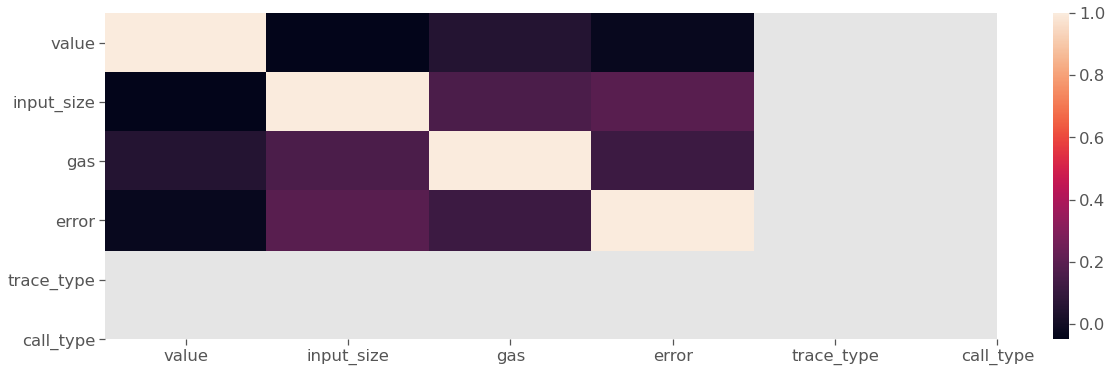

In [87]:
errorTypeSolution.heatmap()

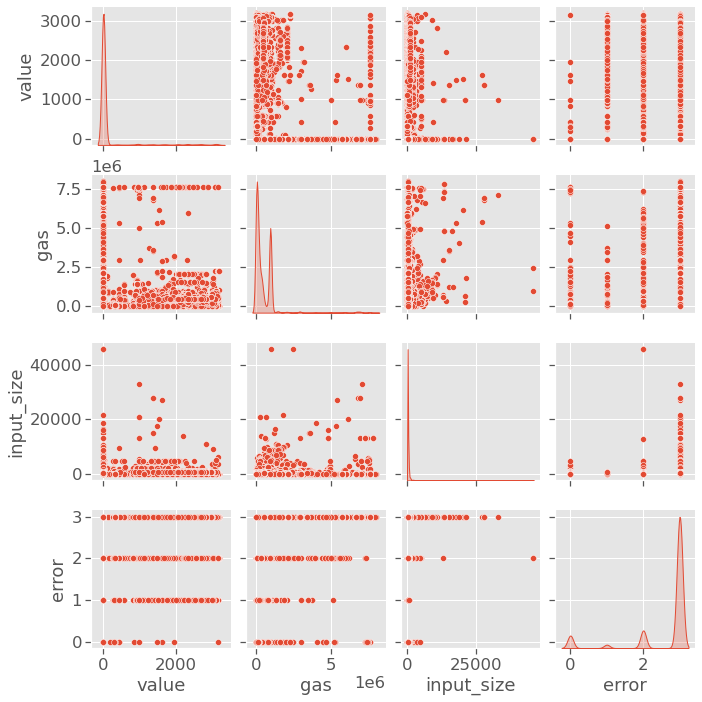

In [88]:
errorTypeSolution.pairplot()

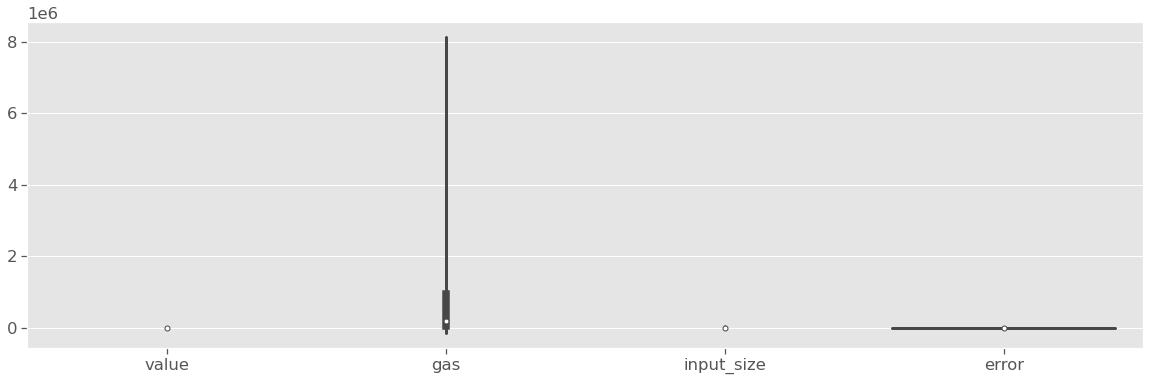

In [89]:
# before normalizing data
errorTypeSolution.violine(errorTypeSolution.df)

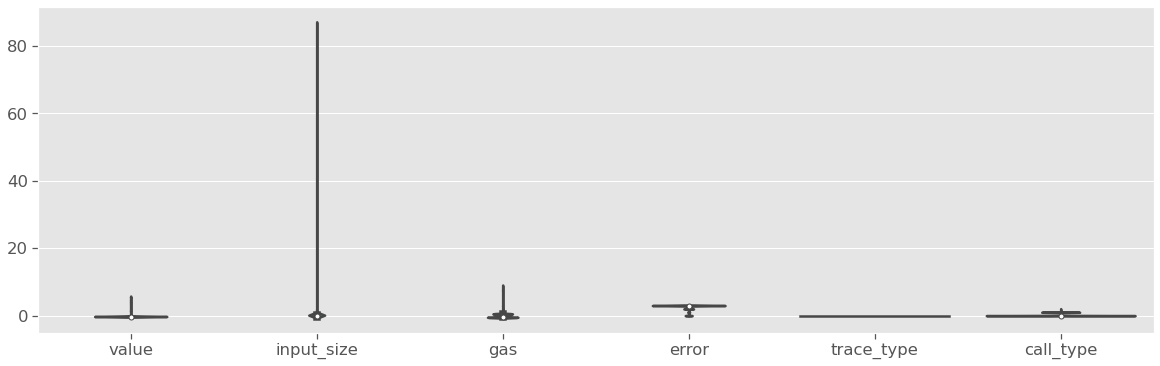

In [90]:
# after normalizing data
errorTypeSolution.violine(errorTypeSolution.normalized_df)

In [91]:
errorTypeSolution.normalized_df.head(5)

,value,input_size,gas,error,trace_type,call_type
0,-0.261120,-0.297272,-0.549619,3.0,0,0
1,-0.261120,-0.542510,-0.436806,3.0,0,0
2,-0.261120,-0.297272,-0.338505,3.0,0,0
3,2.028791,-0.557837,-0.593887,3.0,0,0
9,-0.261120,-0.174652,-0.340447,0.0,0,0


### Transaction Error Types Feature Engineering

range(0, 5)
[[-0.01126985  0.71656158  0.12138738 -0.          0.68678788]
 [ 0.92951633 -0.24093269 -0.04778721 -0.          0.27507675]
 [-0.36762693 -0.64089002 -0.05214025 -0.          0.67185699]
 [-0.02688549  0.13323257 -0.99008226  0.          0.03554396]
 [ 0.          0.          0.         -1.          0.        ]]


,value,gas,call_type,trace_type,input_size,error
0,0,39472.0,call,call,138.0,3
1,0,134201.0,call,call,10.0,3
2,0,216744.0,call,call,138.0,3
3,1240,2300.0,call,call,2.0,3
9,0,215113.0,call,call,202.0,0
...,...,...,...,...,...,...
321481,0,556673.0,call,call,266.0,3
321486,0,556862.0,call,call,266.0,3
321488,0,556673.0,call,call,266.0,3
321491,0,556673.0,call,call,266.0,3


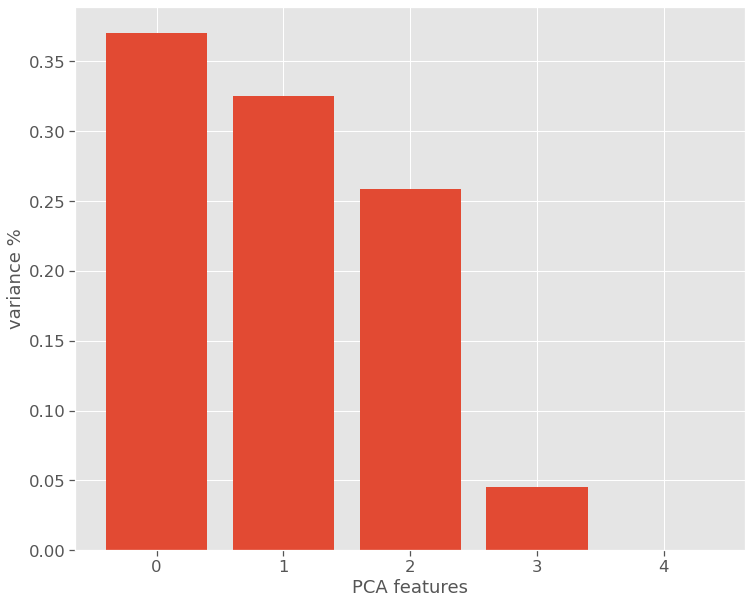

In [92]:
errorTypeSolution._featureEngineering()

<b>Above, we see the first five PCA components have the most variance. Therefor, we only take the first five features</b>

In [93]:
print(errorTypeSolution.PCA_components.shape)
print(errorTypeSolution.labels.shape)

(139177, 5)
(139177,)


<b>For this visualization use case, we will quickly plot just the first two. We do this to notice if there are any clear clusters.</b>

Text(0, 0.5, 'PCA 2')

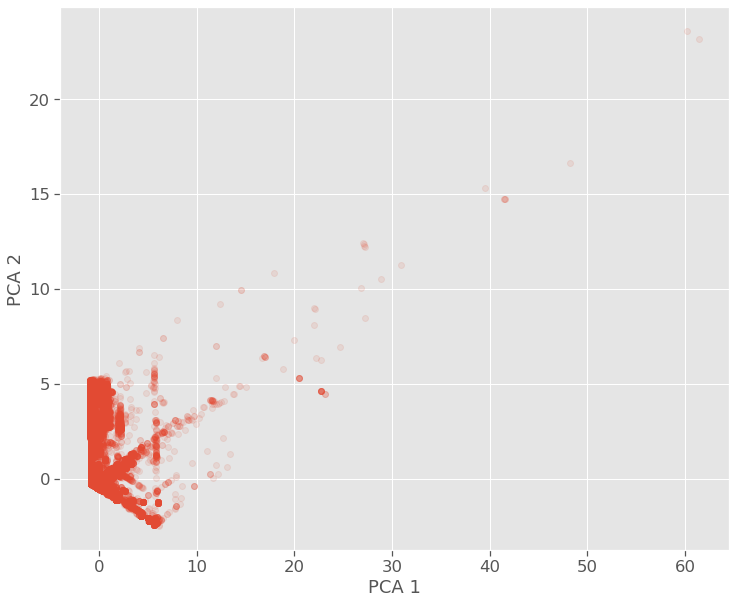

In [94]:
plt.scatter(errorTypeSolution.PCA_components[0], errorTypeSolution.PCA_components[1], alpha=.1)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

<b>From PCA results, the first 3 features dominate the labels variances. We will reduce dimention from 5 features to 3.</b>

In [95]:
errorTypeSolution.normalized_df = errorTypeSolution.normalized_df.iloc[:, :3]
errorTypeSolution.normalized_df['error'] = errorTypeSolution.labels

### Split Transaction Error Types Data into Train, Validate and Test 

##### Concepts: optimizers selection (https://www.deeplearning.ai/ai-notes/optimization/)

[ 0.23641999 -0.27713138  0.07589261]


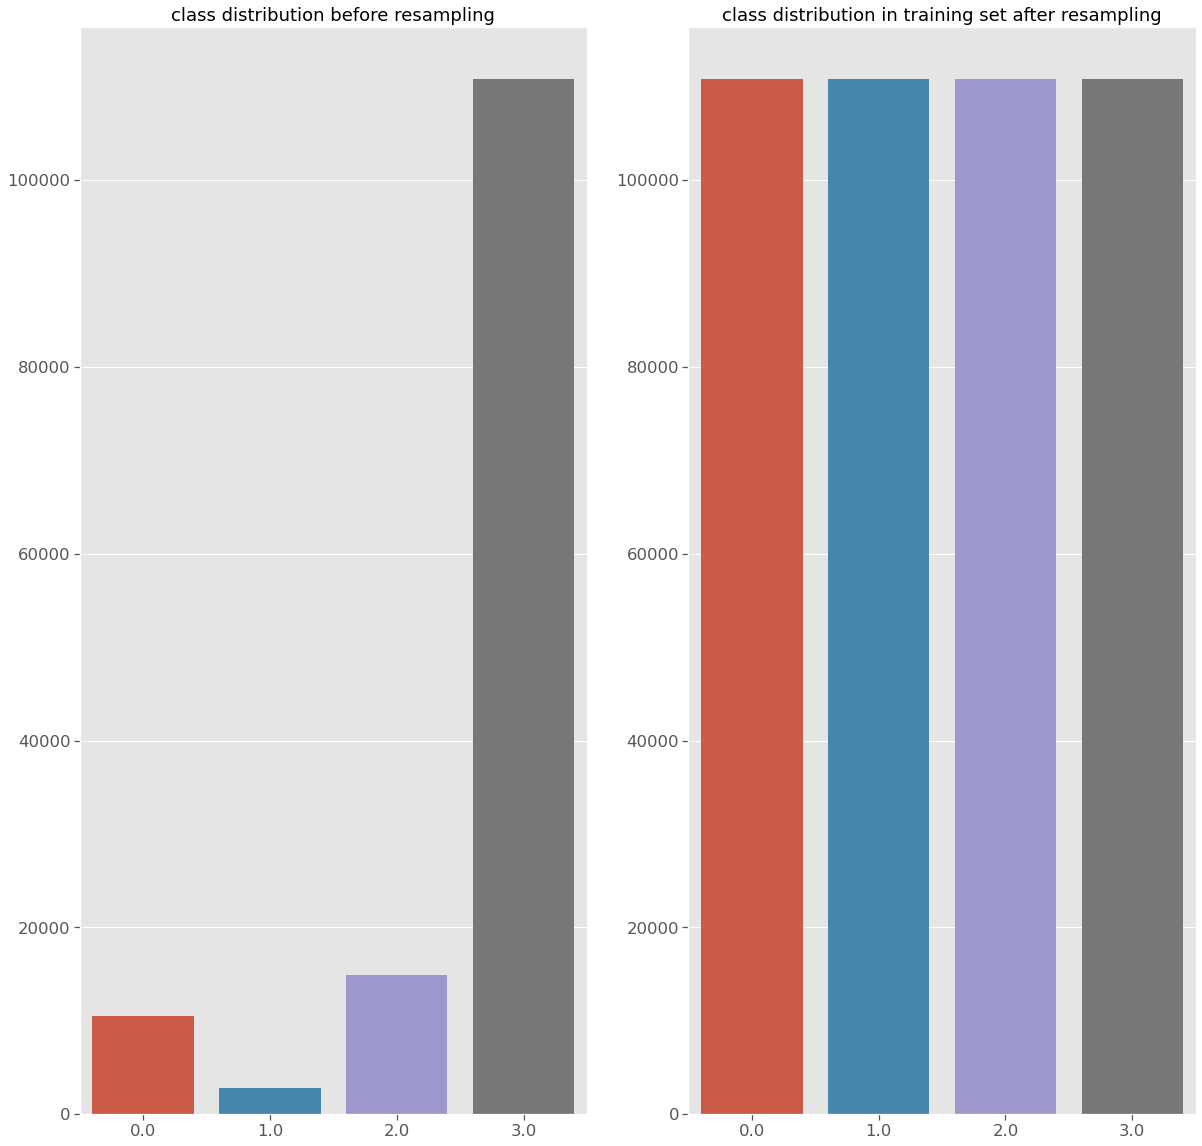

In [96]:
#because the dataset is imbalanced, we need to resample it
x_train, x_validate, x_test, y_train, y_validate, y_test, normalizer = errorTypeSolution.resampling(errorTypeSolution.normalized_df, 'error')

<p>Look at the data distribution
Next compare the distributions of the positive and negative examples over a few features. Good questions to ask yourself at this point are:</p>

### Transaction Error Types Model Training

In [97]:
print(x_train.shape)
print(y_train.shape)

(266049, 3)
(266049,)


### Build Transaction Error Types Model A

In [98]:
errorTypeSolution._buildModelA()

MLPClassifier(max_iter=20)

### Evaluate Transaction Error Types Model A

In [99]:
errorTypeSolution._modelA_evaluation()

ML model:  MLPClassifier
---
Accuracy: {} 0.7236438724954719
---
mean_squared_error: {} 1.1233182750382331
---
F1 score: {}  0.7245163144397071
---
loss: {}  0.27635612750452804
---


,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.12332,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,NaN,NaN,NaN,NaN
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,NaN,NaN,NaN,NaN


#### Save Transaction Error Types Model A and Diagram

In [100]:
pickle.dump(errorTypeSolution.model_A, open('models/6515-project-transaction-errors-type-A.sav', 'wb'))

### Build Transaction Error Types Model B

<h5>Concepts: Dense layer: A linear operation in which every input is connected to every output by a weight (so there are n_inputs * n_outputs weights - which can be a lot!). Generally followed by a non-linear activation function<br/>
Convolutional layer: A linear operation using a subset of the weights of a dense layer. Nearby inputs are connected to nearby outputs (specifically - a convolution 802 ). The weights for the convolutions at each location are shared. Due to the weight sharing, and the use of a subset of the weights of a dense layer, there’s far less weights than in a dense layer. Generally followed by a non-linear activation function<br/>
Pooling layer: Replace each patch in the input with a single output, which is the maximum (can also be average) of the input patch<br/>
Normalisation layer: Scale the input so that the output has near to a zero mean and unit standard deviation, to allow for faster and more resilient training</h5>

In a neural network, numeric data points, called inputs, are fed into the neurons in the input layer. Each neuron has a weight, and multiplying the input number with the weight gives the output of the neuron, which is transferred to the next layer.<br/>



The activation function is a mathematical “gate” in between the input feeding the current neuron and its output going to the next layer. It can be as simple as a step function that turns the neuron output on and off, depending on a rule or threshold. Or it can be a transformation that maps the input signals into output signals that are needed for the neural network to function.

In [101]:
errorTypeSolution.normalized_df.isnull().sum()

value        0
gas          0
call_type    0
error        0
dtype: int64

In [102]:
np.unique(errorTypeSolution.normalized_df['error'], return_counts=1)
# so outputdim is 4

(array([0., 1., 2., 3.]), array([ 10570,   2849,  14904, 110854], dtype=int64))

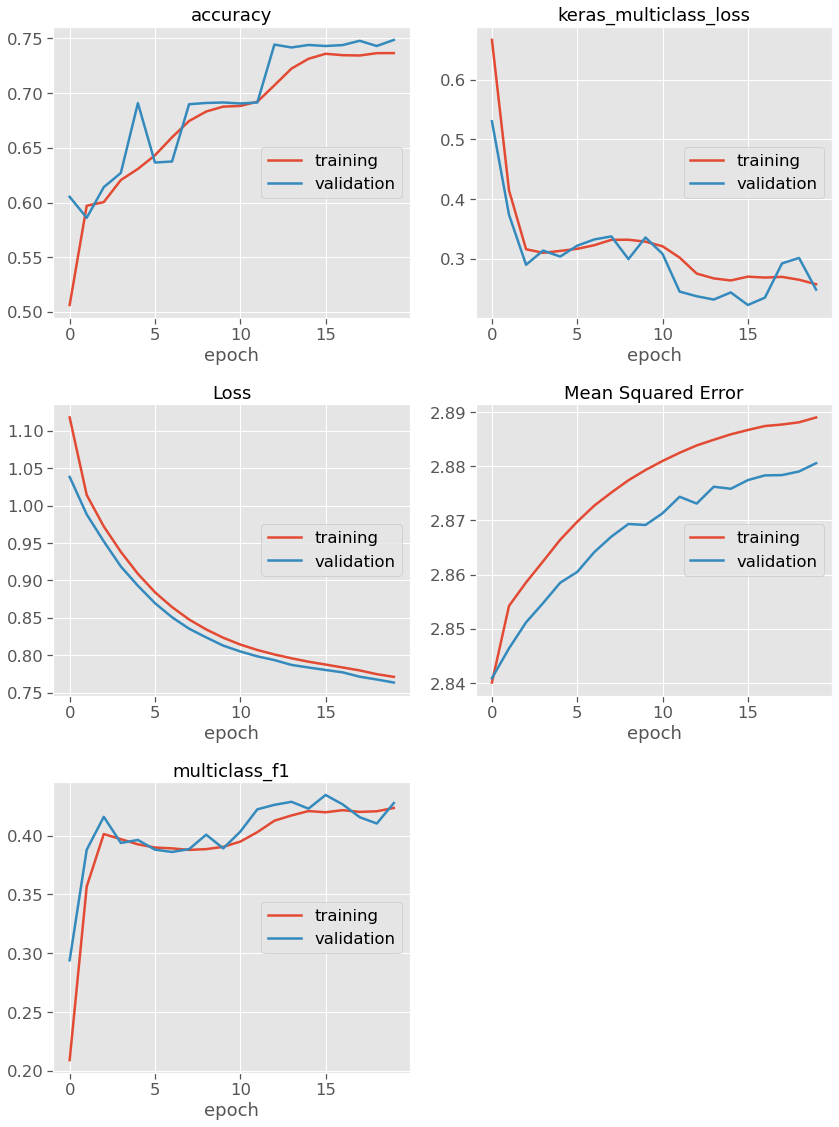

accuracy
	training         	 (min:    0.506, max:    0.737, cur:    0.737)
	validation       	 (min:    0.586, max:    0.749, cur:    0.749)
keras_multiclass_loss
	training         	 (min:    0.257, max:    0.667, cur:    0.257)
	validation       	 (min:    0.223, max:    0.530, cur:    0.248)
Loss
	training         	 (min:    0.771, max:    1.118, cur:    0.771)
	validation       	 (min:    0.764, max:    1.038, cur:    0.764)
Mean Squared Error
	training         	 (min:    2.840, max:    2.889, cur:    2.889)
	validation       	 (min:    2.841, max:    2.881, cur:    2.881)
multiclass_f1
	training         	 (min:    0.209, max:    0.423, cur:    0.423)
	validation       	 (min:    0.294, max:    0.435, cur:    0.428)
887/887 [==============================] - 5s 6ms/step - loss: 0.7711 - accuracy: 0.7366 - multiclass_f1: 0.4235 - keras_multiclass_loss: 0.2575 - mse: 2.8890 - val_loss: 0.7635 - val_accuracy: 0.7486 - val_multiclass_f1: 0.4276 - val_keras_multiclass_loss: 0.2484 - val_

In [103]:
#multiple classes classification
#optional utilize KerasClassifier To get a bona fide scikit estimator 
clf = KerasClassifier(errorTypeSolution._buildModelB, n_features=3, outputdim=4 ,metrics =errorTypeSolution.metrics, epochs=EPOCH, batch_size=BATCH_SIZE, verbose=1)
clf.fit(x_train, y_train, validation_data=(x_validate, y_validate),
          callbacks=[PlotLossesKeras()])
# clf.fit(x_train, y_train)

<h5>concepts: An epoch is a term used in machine learning and indicates the number of passes of the entire training dataset the machine learning algorithm has completed. Datasets are usually grouped into batches (especially when the amount of data is very large).</h5>

### Evaluate Transaction Error Types Model B

In [104]:
errorTypeSolution._buildModelB(3,4, metrics =errorTypeSolution.metrics)
errorTypeSolution._modelB_evaluation()

Epoch 1/20
887/887 [==============================] - 2s 3ms/step - loss: 1.1242 - accuracy: 0.5044 - multiclass_f1: 0.1965 - keras_multiclass_loss: 0.6867 - mse: 2.8539
Epoch 2/20
887/887 [==============================] - 2s 3ms/step - loss: 1.0059 - accuracy: 0.5926 - multiclass_f1: 0.3414 - keras_multiclass_loss: 0.4271 - mse: 2.8542
Epoch 3/20
887/887 [==============================] - 2s 3ms/step - loss: 0.9550 - accuracy: 0.5914 - multiclass_f1: 0.3896 - keras_multiclass_loss: 0.3233 - mse: 2.8599
Epoch 4/20
887/887 [==============================] - 2s 3ms/step - loss: 0.9142 - accuracy: 0.6153 - multiclass_f1: 0.3961 - keras_multiclass_loss: 0.3089 - mse: 2.8652
Epoch 5/20
887/887 [==============================] - 2s 3ms/step - loss: 0.8810 - accuracy: 0.6488 - multiclass_f1: 0.3958 - keras_multiclass_loss: 0.3066 - mse: 2.8701
Epoch 6/20
887/887 [==============================] - 2s 3ms/step - loss: 0.8579 - accuracy: 0.6778 - multiclass_f1: 0.3950 - keras_multiclass_loss: 0

,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.12332,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,0.719662,0.414101,2.88141,0.288774
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,NaN,NaN,NaN,NaN


In [105]:
# visulaize the model
errorTypeSolution.model_B.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 60)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 244       
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


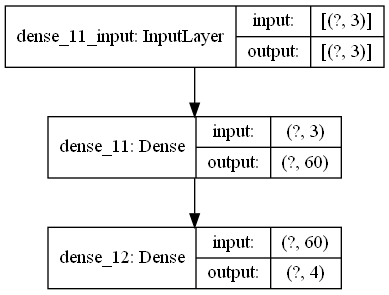

In [106]:
plot_model(errorTypeSolution.model_B, 'models/6515_project_transaction_error_types_model_B_baseline.png', show_shapes=True)

### Compare Transaction Error Types Model A and Model B baseline

In [107]:
errorTypeSolution.performances

,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.12332,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,0.719662,0.414101,2.88141,0.288774
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,NaN,NaN,NaN,NaN


In [108]:
errorTypeSolution.performances.fillna(0)

,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.123318,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,0.719662,0.414101,2.881405,0.288774
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,0.000000,0.000000,0.000000,0.000000


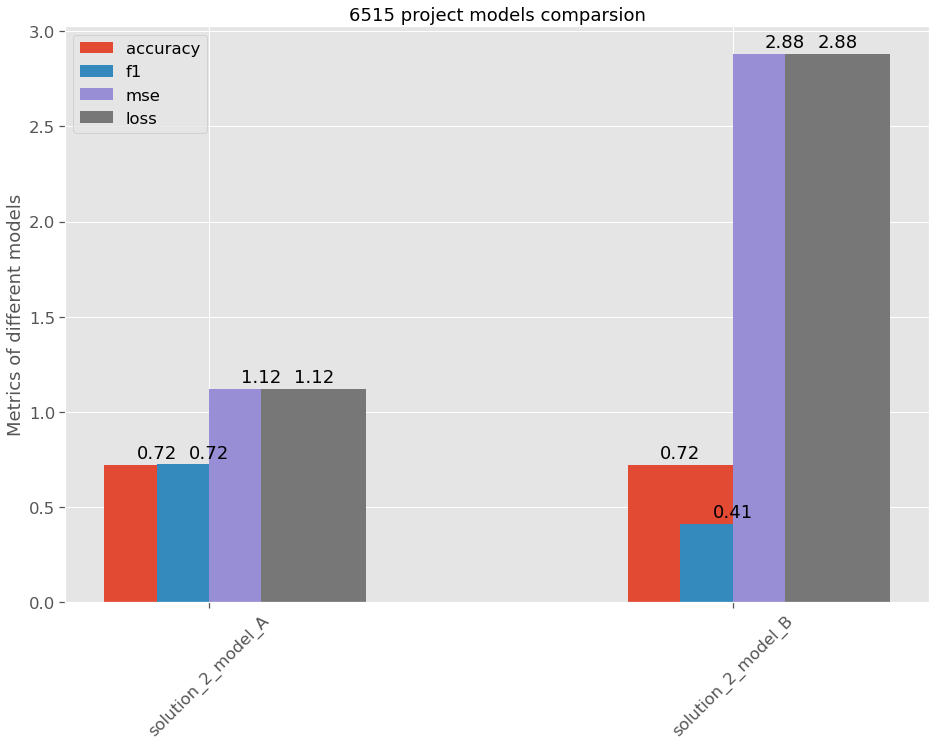

,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.12332,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,0.719662,0.414101,2.88141,0.288774
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,NaN,NaN,NaN,NaN


In [109]:
errorTypeSolution._modelComparsion(2)

#### Save Transaction Error Types Model B and Diagram

In [110]:
errorTypeSolution.model_B.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 60)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 244       
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


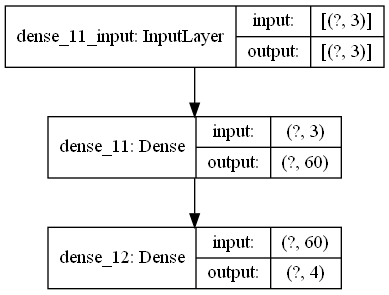

In [111]:
plot_model(errorTypeSolution.model_B, 'models/6515-project-transaction-error-type-model-B.png', show_shapes=True)

In [112]:
#save and load model
errorTypeSolution.model_B.save('models/6515_project_blockchain_error_type__model_B.h5')

<h3>based on the A and B model evaluation, we can see the model A is better than model B baseline in terms of f1 score and loss. </h3>
<h4>However, since model B is a baseline model. We should consider to optimize model B baseline to compare again.</h4>

### Build Transaction Error Types Optimized Model C



#### Transaction Error Types Model Optimization

#### Optimization method 1: More hidden layers, wider layers, add dropout layer

In [113]:
# errorTypeSolution.METRICS = errorTypeSolution.metrics
errorTypeSolution._buildOptimizedModelC("adam", 3, 4)

In [114]:
errorTypeSolution.model_C.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 404       
Total params: 41,504
Trainable params: 41,504
Non-trainable params: 0
__________________________________________________

<h4> Optimization method 2: Overcome the underfiting bias </h4>
<p>

Set the correct initial bias.
These initial guesses are not great. You know the dataset is imbalanced. Set the output layer's bias to reflect that (See: A Recipe for Training Neural Networks: "init well"). This can help with initial convergence.

With the default bias initialization the loss should be about math.log(2) = 0.69314</p>
<p>The correct bias to set can be derived from:
p0 = pos / (pos+neg) = 1 / (1 + e powered (-b0))
b0 = -log e (pos/neg)</p>

<h4>Optimization method 3: Checkpoint the initial weights</h4>
<p>To make the various training runs more comparable, keep this initial model's weights in a checkpoint file, and load them into each model before training.</p>

#### Optimization method 4: Early stopping
Stop ongoing epoch training as soon as watched metric value reach the peak.

#### Next, I pipelined all the optimization methods to make them work in a streamline.

In [115]:
x_validate.shape

(141893, 3)

In [116]:
errorTypeSolution.model_C.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 404       
Total params: 41,504
Trainable params: 41,504
Non-trainable params: 0
__________________________________________________

In [117]:
model_C_history = errorTypeSolution._optimizeModelPipeline()

Epoch 1/20
887/887 [==============================] - 9s 10ms/step - loss: 0.9888 - accuracy: 0.5731 - multiclass_f1: 0.3834 - keras_multiclass_loss: 0.3378 - mse: 2.8714 - val_loss: 0.8345 - val_accuracy: 0.6751 - val_multiclass_f1: 0.4481 - val_keras_multiclass_loss: 0.2058 - val_mse: 2.8751
Epoch 2/20
887/887 [==============================] - 8s 9ms/step - loss: 0.8367 - accuracy: 0.6574 - multiclass_f1: 0.4297 - keras_multiclass_loss: 0.2405 - mse: 2.8863 - val_loss: 0.7749 - val_accuracy: 0.6762 - val_multiclass_f1: 0.4310 - val_keras_multiclass_loss: 0.2456 - val_mse: 2.8846
Epoch 3/20
887/887 [==============================] - 8s 9ms/step - loss: 0.7977 - accuracy: 0.6801 - multiclass_f1: 0.4319 - keras_multiclass_loss: 0.2413 - mse: 2.8927 - val_loss: 0.7499 - val_accuracy: 0.6786 - val_multiclass_f1: 0.4129 - val_keras_multiclass_loss: 0.2736 - val_mse: 2.8875
Epoch 4/20
887/887 [==============================] - 8s 9ms/step - loss: 0.7745 - accuracy: 0.6891 - multiclass_f1: 

<h5>Check training history </h5>

In [118]:
math.ceil(len(model_C_history.history.keys()) / 2)

5

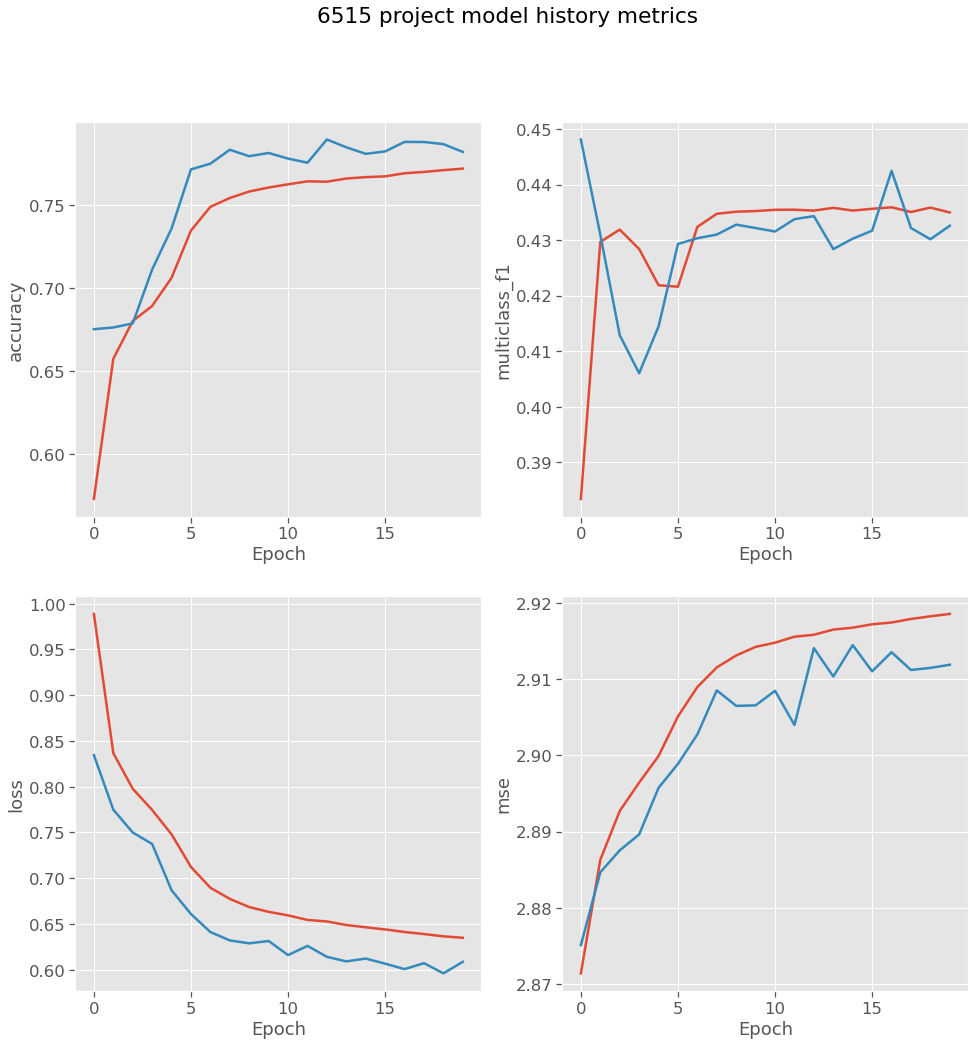

In [119]:
plot_history_metrics(model_C_history, mode='multiclass')

<h4>The plots shows when we train more, we can achieve the better performance. The accuracy can reach 0.8 when training 20 times, which is higher than model A, however, the F1 score is lower than model A still. We still select model A as the best model.</h4>

### Evaluate Transaction Error Types Model C
<b>Evaluate your model on the test dataset and display the results for the metrics you created above.</b>

In [120]:
errorTypeSolution._modelC_optimized_evaluation()

4435/4435 [==============================] - ETA: 0s - loss: 0.6086 - accuracy: 0.7817 - multiclass_f1: 0.4278 - keras_multiclass_loss: 0.2469 - mse: 2.91 - 11s 2ms/step - loss: 0.6086 - accuracy: 0.7817 - multiclass_f1: 0.4278 - keras_multiclass_loss: 0.2469 - mse: 2.9119
loss :  0.6085558533668518
accuracy :  0.7816946506500244
multiclass_f1 :  0.42775899171829224
keras_multiclass_loss :  0.24687616527080536
mse :  2.911900281906128


,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.12332,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,0.719662,0.414101,2.88141,0.288774
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,0.781695,0.427759,2.9119,0.246876


### Compare Transaction Error Types Model A, B and C

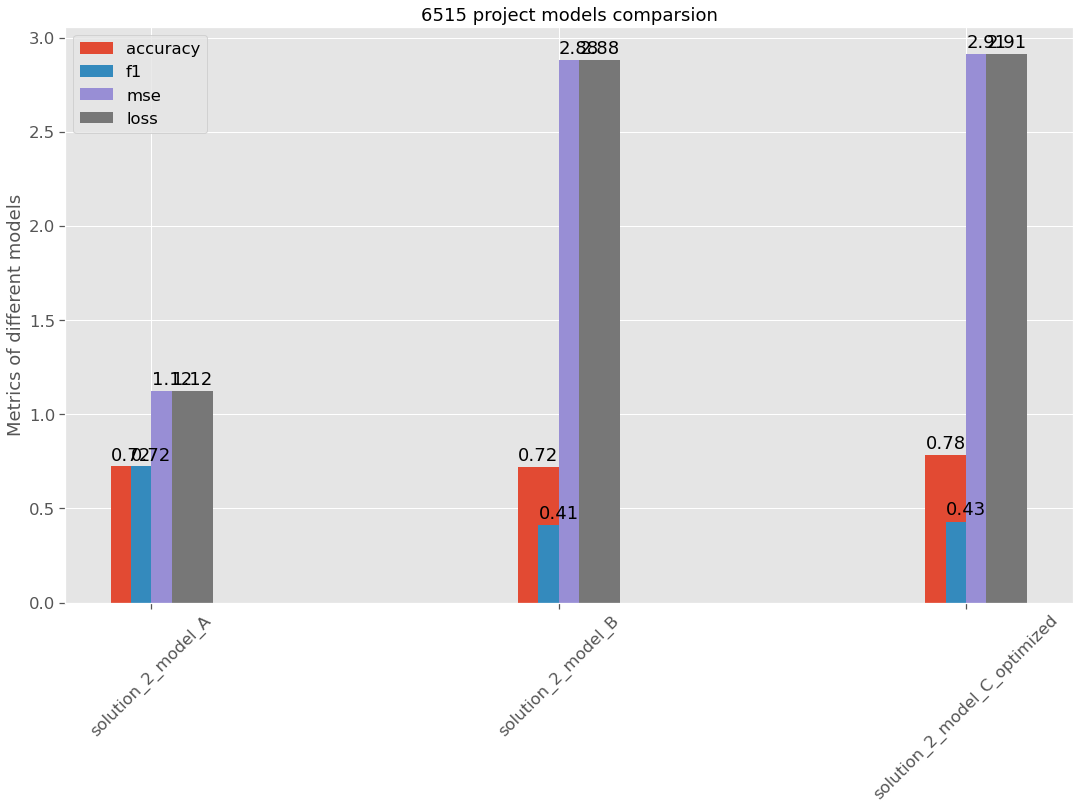

,model,model_name,accuracy,f1,mse,loss
0,solution_2_model_A,error_code_sklearn_MLP,0.723644,0.724516,1.12332,0.276356
1,solution_2_model_B,error_code_tensorflow_baseline,0.719662,0.414101,2.88141,0.288774
2,solution_2_model_C_optimized,error_code_tensorflow_optimized,0.781695,0.427759,2.9119,0.246876


In [121]:
errorTypeSolution._modelComparsion(3, 0.1, 0.05, 14, 8)

<h3>The plots shows when we train more, we can achieve the better performance. The optimized accuracy and F1 of model C are better than model A, however, the F1 score is much lower than model A still, even model C improved a little about F1 than model B. Therfore, We should still select model A as the best model.</h3>
<h4>It leaves future works for me to continuously optimize Keras deep learning model, so that it could perform better than basic Sklearn classifier</h4> 

#### Save Transaction Error Types Model C and Diagram

In [122]:
errorTypeSolution.model_C.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 200)               800       
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_15 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_16 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 404       
Total params: 41,504
Trainable params: 41,504
Non-trainable params: 0
__________________________________________________

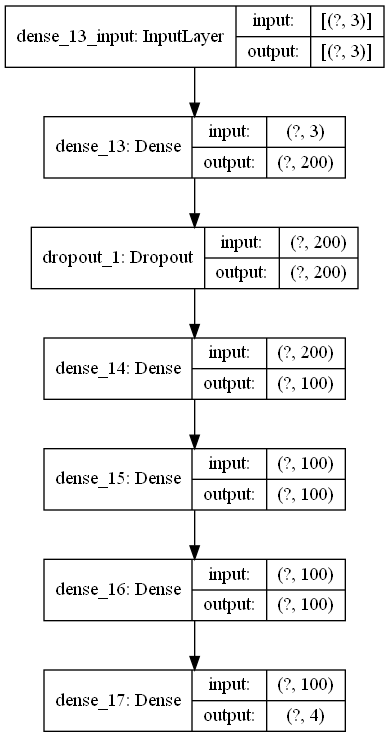

In [123]:
plot_model(errorTypeSolution.model_C, 'models/6515-project-transaction-error-types-model-C.png', show_shapes=True)

In [124]:
#save and load model
errorTypeSolution.model_C.save('models/6515-project-transaction-error-types-model-C.h5')

### Extract Another Test Data to Validate Transaction Error Types Model 

In [125]:
errorTypeSolution.x_test_resample

array([[-0.26112017, -0.50530744,  0.        ],
       [-0.26112017,  0.54455554,  1.        ],
       [-0.26112017,  0.5646746 ,  0.        ],
       ...,
       [-0.26112017, -0.55094635,  0.        ],
       [-0.26112017, -0.55263865,  0.        ],
       [-0.26112017, -0.36232308,  0.        ]], dtype=float32)

In [126]:
print(errorTypeSolution.x_test_resample.shape)
print(errorTypeSolution.y_test_resample.shape)

(35474, 3)
(35474,)


In [127]:
#take a random record for validating 
errorTypeSolution.x_test_resample[100:101,:]

array([[ 1.1442202 , -0.59662575,  0.        ]], dtype=float32)

In [128]:
y_actual_single = errorTypeSolution.y_test_resample[100:101]
y_actual_single

array([2.])

In [129]:
[errorTypeSolution.x_test_resample[100:101,:]]

[array([[ 1.1442202 , -0.59662575,  0.        ]], dtype=float32)]

In [130]:
# load the model from file
from tensorflow.keras.models import load_model
trace_status_model = load_model('models/6515-project-transaction-error-types-model-C.h5', custom_objects={'multiclass_f1': multiclass_f1, 'keras_multiclass_loss':keras_multiclass_loss})
# make a prediction
yhat_c = trace_status_model.predict_classes(errorTypeSolution.x_test_resample[100:101,:], batch_size=BATCH_SIZE)
yhat_a = errorTypeSolution.model_A.predict(errorTypeSolution.x_test_resample[100:101,:])
print('Model A Predicted: %.3f' % yhat_a)
print('Model C Predicted: %.3f' % yhat_c)
print('actual: %.3f' % y_actual_single)

Model A Predicted: 2.000
Model C Predicted: 2.000
actual: 2.000


In [131]:
yhat_a

array([2.])

In [132]:
yhat_c

array([2], dtype=int64)

<b>Above the single predictionresult is quite well matched up</b>

<b>Prediction above indicate the model can actually predicte very well on the label (transaction status)</b>

### Conclusion: Generalize guildline of predicting Transaction Error Types for Enduser
#### Based on the experience of this research, we are proposing the guideline for the end-user is as following: 
##### 1)	Step one: 
###### We shall identify the problem within the desired business domain. We need to extract the Ethereum Data from BigQuery;  Then, we need to utilize data preprocessing techniques on the sample data. For instance, I identified there are several issues I can work on, such as:
•	Transaction Status Analytics (Binary-Classification): learning for prediction Ethereum transaction status.<br/>
•	Error Types Analytics (Multi-Classification): Learning for Prediction error types of Ethereum Transaction.<br/>
##### 2)	Step two:
###### For each problem we identified, we shall consider a couple of possible solutions. Then, we need to choose a more efficient approach to solve the problem. For instance, the datasets I chose is about big data analytics. Therefore, deep learning with a neural network is the appropriate choice. However, there are many deep learning libraries on the market. We need to choose wisely based on the comparisons of advantages and disadvantages. For instance, I came up with solutions with three possible approaches, such as:
•	SKlearn (e.g., Random forest tree, SVM): the advantages include easy to train and build, easy to tune up the hypermeters like depth, iteration. The disadvantages include Less interpretation, less accuracy on BIg data, less efficiency on Big Data.<br/>
•	Keras: the advantages include more efficiency and accuracy on big data training, GPU, and CPU. Less learning curve compared with PyTorch. The disadvantages include a higher learning curve compared with SKLearn.<br/>
•	PyTorch: The advantages include more specific customization of neural networking, maximize the potential power of GPU. The disadvantages include the highest learning curve, need more testing on tuning up hyperparameters.<br/>
After careful comparison between those solutions, we should choose the best solution with convincible reasons.
##### 3)	Step three:
###### Based on analyzing the solutions discussed in Step two, we need to create a high-level design with a recommended data flow diagram. For a good design, a dataset explanatory understanding and explanation should take place. At this point, the visualization can kick in to help us understand datasets better. Therefore, we can follow the practical design to implement our solution. For instance, I decided to choose Tensorflow Keras Classifiers (Binary and Multi-classification) to solve each topic. And I started with a design diagram, requirement specification, and data flow details discussed in previous sections. At this step, we might start with feature engineering on preprocessed datasets for the most appropriate features of solution model training. 
##### 4)	Step four:
###### At this step, we can actually build our models and train them with the sample data. More importantly, we need to utilize the rich metrics [Fig 14. Metrics Used in Project] to evaluate my models for comparison. However, depending on the model classification types, we shall choose the most suitable metrics. For instance, I chose the confusion matrix, F1 score, AUC, precision, and recall for binary classification, while I chose accuracy, loss, and customized F1 for multiclass. Besides, I employed visualization for the statistical results to make the comparison more understandable. Moreover, I give possible optimization solutions for Keras models, such as early dropping, weight, and bias initialization.
##### 5)	Step five:
###### Document experiences during the solution to defined problems. Note down the lesson learn from the model training, evaluation, and optimization process. Save the selection model for similar problems in the future. 

